# DES +/- .1% Fixed Bins: 4 z bins from 0 to 0.8 and 7 k bins from 0.025 to 1.6

## To make the residual plots

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# import sys, platform, site, pprint
# print(sys.executable)
# print(platform.python_version(), platform.machine())
# pprint.pprint(site.getsitepackages())

In [65]:
# Loading Data 

k_bins = {}
z_bins = {}

max_val = 1.001
min_val = 0.999

for g_val in [max_val, min_val]:
    g_key = f'{g_val:.3f}'
    for k in range(7):
        k_bins[f'{g_key}_{k}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{g_val}kbin{k}.modelvector')

for gnew_val in [max_val, min_val]:
    gnew_key = f'{gnew_val:.3f}'
    for z in range(4):
        z_bins[f'{gnew_key}_{z}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{gnew_key}zbin{z}.modelvector')

In [66]:
# Initialize lists for k and z bins
k_lists = {f'k{i}_list': np.zeros(400) for i in range(7)}
z_lists = {f'z{i}_list': np.zeros(400) for i in range(4)}

denom = max_val - min_val

# Populate k and z lists with calculations
for i in range(400):
    for k in range(7):
        k_lists[f'k{k}_list'][i] = (k_bins[f'1.001_{k}'][i][1] - k_bins[f'0.999_{k}'][i][1]) / denom
    for k in range(4):
        z_lists[f'z{k}_list'][i] = (z_bins[f'1.001_{k}'][i][1] - z_bins[f'0.999_{k}'][i][1]) / denom

# Initialize residuals for k and z bins
resid_z = {f'resid_z{i}': np.zeros((400, 2)) for i in range(4)}
resid_k = {f'resid_k{i}': np.zeros((400, 2)) for i in range(7)}

# Calculate residuals
for i in range(400):
    for j in range(4):
        resid_z[f'resid_z{j}'][i] = [i, (z_bins[f'1.001_{j}'][i][1] - z_bins[f'0.999_{j}'][i][1]) / z_bins[f'0.999_{j}'][i][1]]
    for j in range(7):
        resid_k[f'resid_k{j}'][i] = [i, (k_bins[f'1.001_{j}'][i][1] - k_bins[f'0.999_{j}'][i][1]) / k_bins[f'0.999_{j}'][i][1]]


In [67]:
residuals_list = [resid_k[f'resid_k{i}'] for i in range(7)] + [resid_z[f'resid_z{i}'] for i in range(4)]

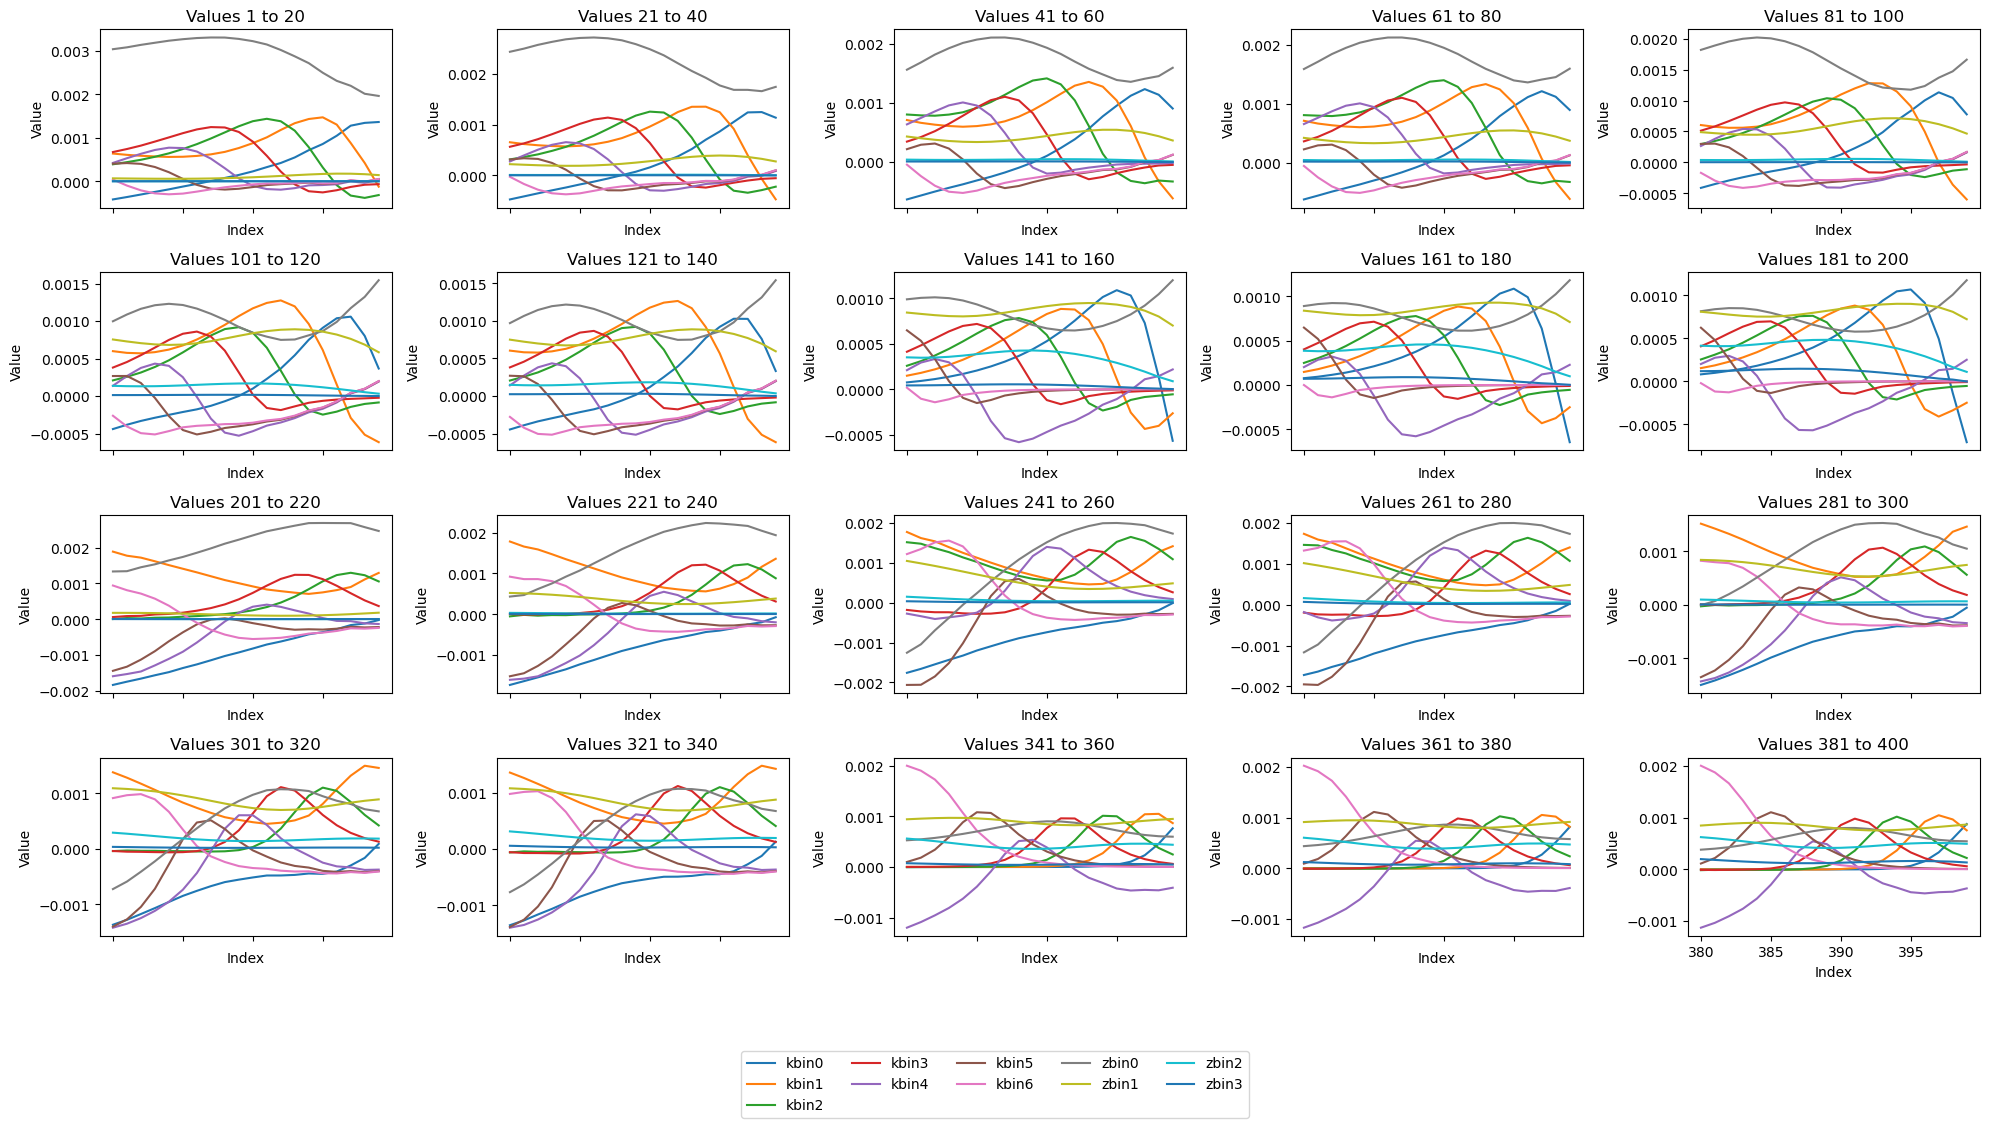

In [68]:
# full residuals

data = residuals_list

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

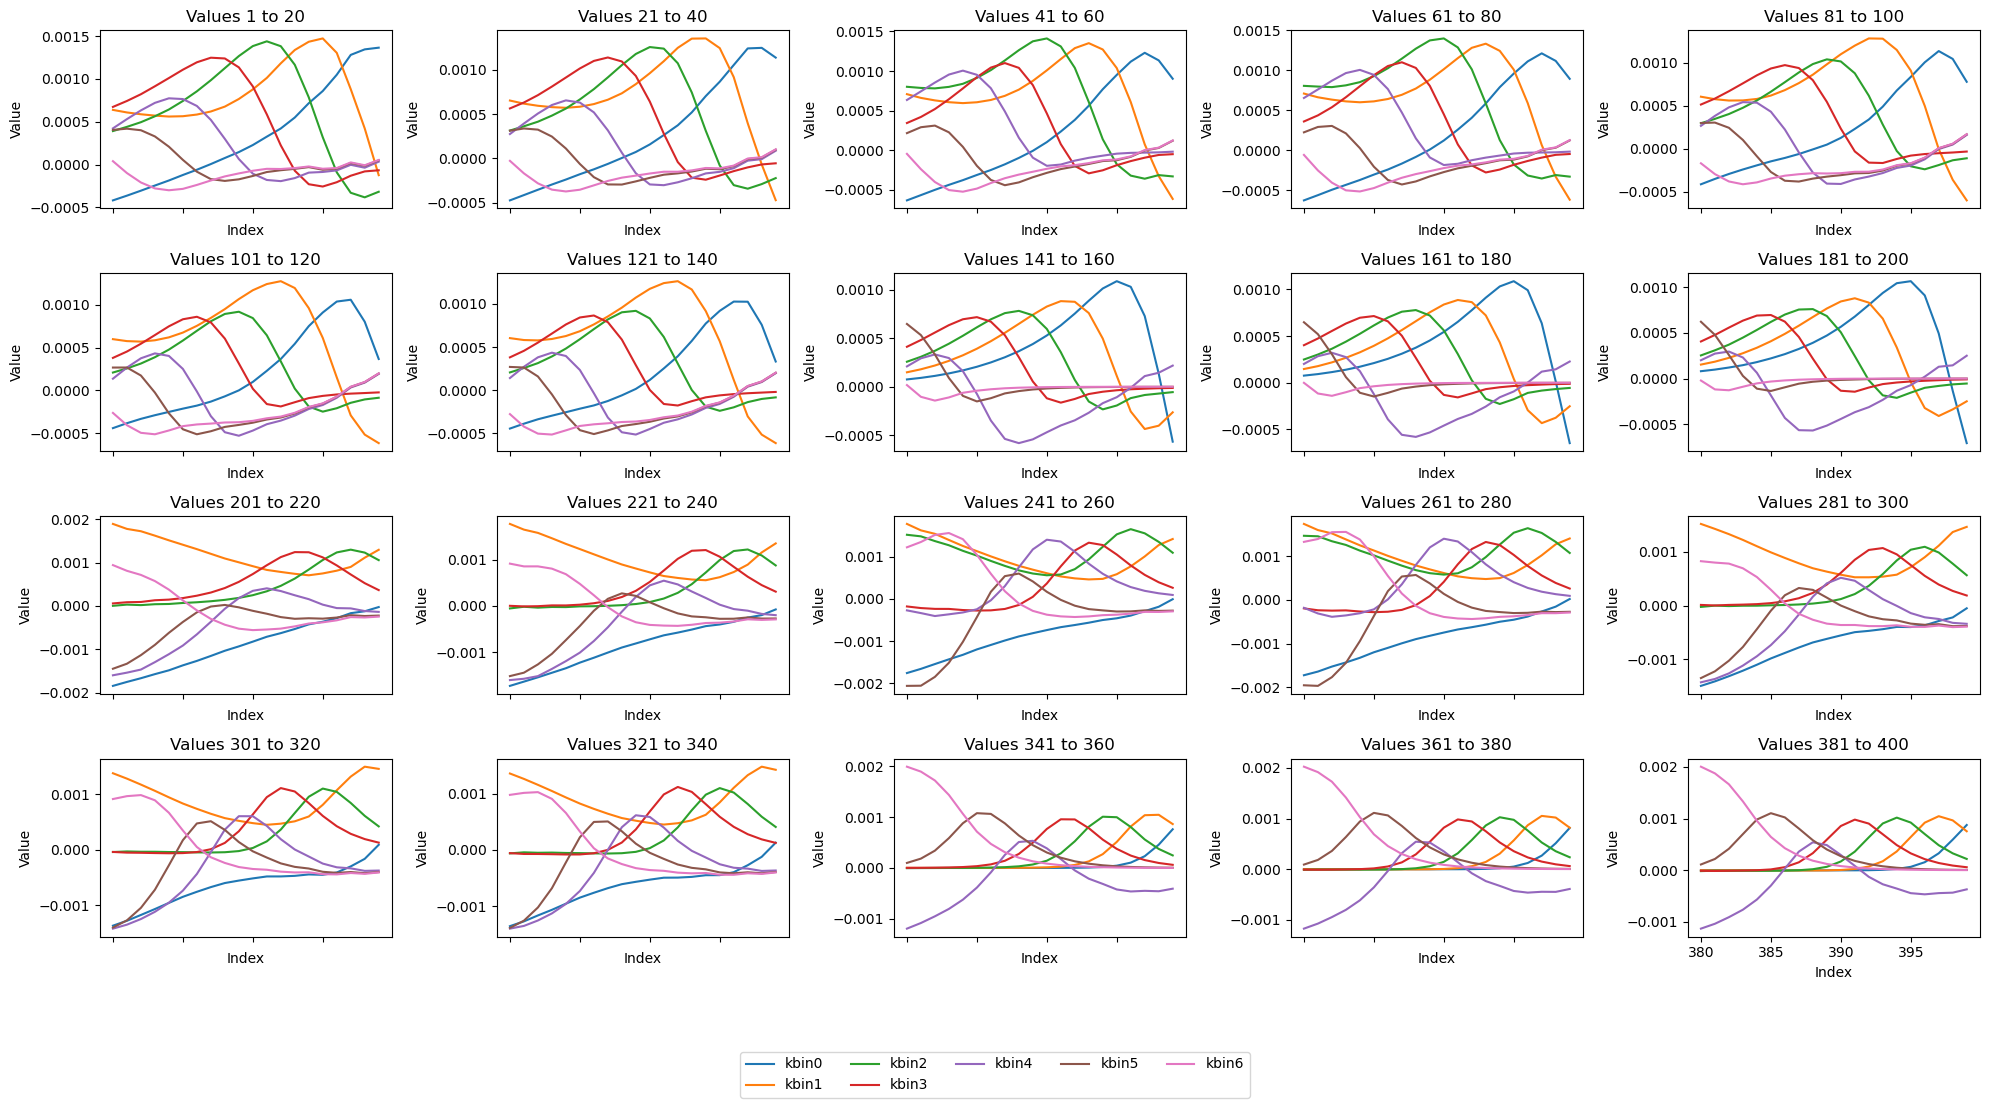

In [69]:
# k residuals only

data = [resid_k[f'resid_k{i}'] for i in range(7)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

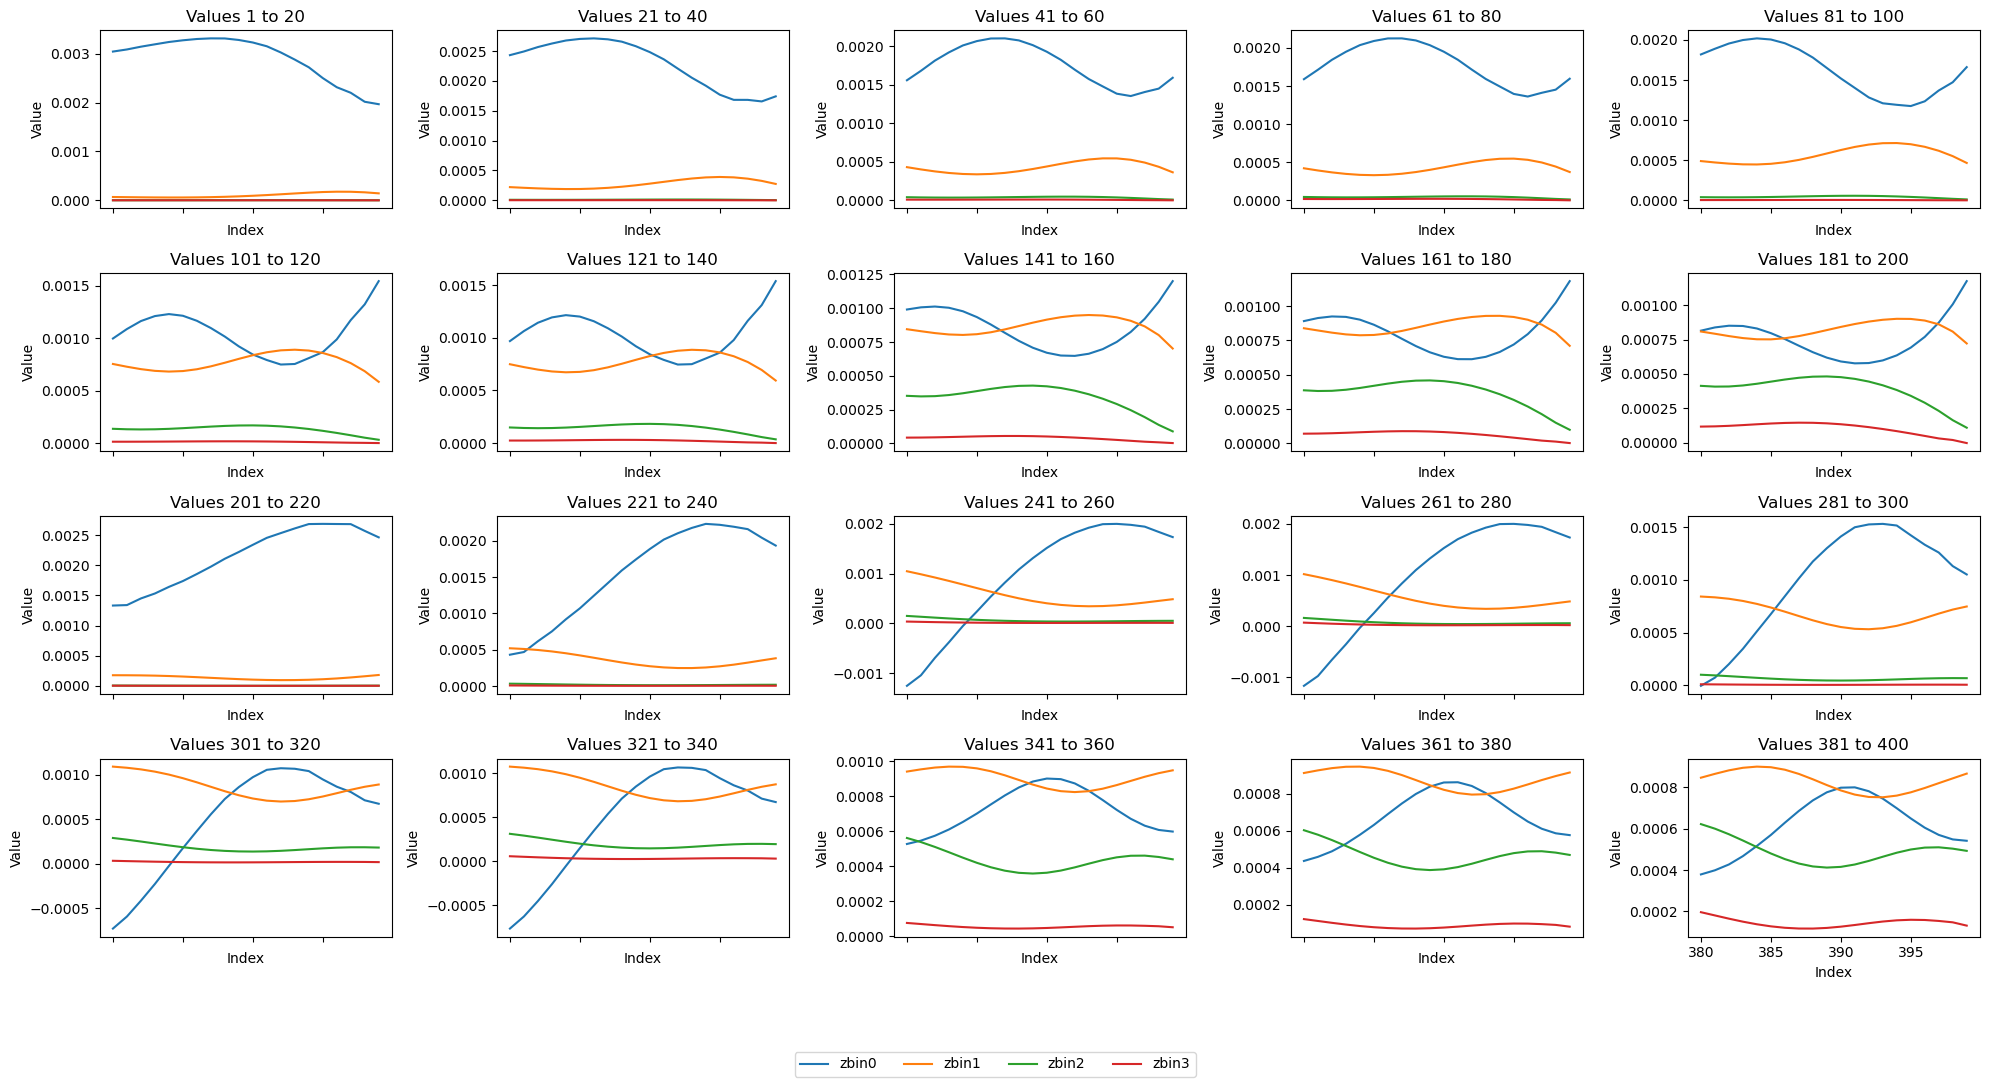

In [70]:
# z residuals only

data = [resid_z[f'resid_z{i}'] for i in range(4)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'zbin{i}'
        else:
            label = f'zbin{i - 5}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Make Fisher, Corner Plots, PCA

In [71]:
def get_full_cov(cov_file):
    print("Getting covariance...")
    full_cov = np.loadtxt(cov_file)
    cov = np.zeros((output_dims, output_dims))
    cov_scenario = full_cov.shape[1]
    for line in full_cov:
        i = int(line[0])
        j = int(line[1])
        if(cov_scenario==3):
            cov_ij = line[2]
        elif(cov_scenario==10):
            cov_g_block  = line[8]
            cov_ng_block = line[9]
            cov_ij = cov_g_block + cov_ng_block
        cov[i,j] = cov_ij
        cov[j,i] = cov_ij
    return cov
#masked_inv_cov = np.linalg.inv(cov[mask][:,mask])

cov_file = "data/cov_unblinded_final.txt"
output_dims = 900

cov = get_full_cov(cov_file)

cov_sub = cov[:400, :400]

inv_cov_sub = np.linalg.inv(cov_sub)

masked_inv_cov = np.linalg.inv(cov)

masked_inv_cov = np.zeros((900, 900))

masked_inv_cov[:400, :400] = inv_cov_sub

Getting covariance...


In [72]:
masked_inv_cov = masked_inv_cov[:400, :400]

In [73]:
derivatives = np.array([*k_lists.values(), *z_lists.values()])

derivatives

array([[-7.90715e-06, -5.85620e-06, -4.13370e-06, ...,  2.99805e-07,
         4.52480e-07,  5.47875e-07],
       [ 1.20822e-05,  9.82680e-06,  7.97330e-06, ...,  9.57345e-07,
         7.36940e-07,  4.72120e-07],
       [ 7.40580e-06,  7.11300e-06,  6.71750e-06, ...,  4.43010e-07,
         2.49745e-07,  1.36720e-07],
       ...,
       [ 1.28190e-06,  1.03995e-06,  8.33100e-07, ...,  7.50740e-07,
         6.43995e-07,  5.42280e-07],
       [ 2.39500e-08,  1.93000e-08,  1.57000e-08, ...,  4.67110e-07,
         3.84705e-07,  3.08665e-07],
       [ 1.21500e-08,  1.02000e-08,  8.60000e-09, ...,  1.41380e-07,
         1.12870e-07,  8.25250e-08]], shape=(11, 400))

In [74]:
num_params = derivatives.shape[0]
fisher_matrix = np.zeros((num_params, num_params))

# Construct the Fisher matrix
for i in range(num_params):
    for j in range(num_params):
        fisher_matrix[i, j] = derivatives[i, :] @ masked_inv_cov @ derivatives[j, :]

print("Fisher Matrix:\n", fisher_matrix)

Fisher Matrix:
 [[ 222.14073652 -110.54373552  -44.71538544  -56.8918396   -65.53348193
    48.8196995    52.96785859 -139.73755799   -5.32733876   46.4041377
     9.70248209]
 [-110.54373552  267.17663137  154.85140275   85.6173895   -24.3754999
   -62.07164784  -54.46657277  352.0984081   102.9981042    12.8685226
     1.80229552]
 [ -44.71538544  154.85140275  327.01061582  220.60137322   29.31540795
   -52.91421974  -59.6495184   473.92795642   92.52809898   37.0843082
     8.83219917]
 [ -56.8918396    85.6173895   220.60137322  394.6371572   160.38663952
   -11.94548905  -96.43026766  653.26839915  127.01198784   49.89885885
    10.45239913]
 [ -65.53348193  -24.3754999    29.31540795  160.38663952  374.60624015
    48.25042284 -176.44058061  350.67729149  -60.00973247  -52.74496109
    -9.61124475]
 [  48.8196995   -62.07164784  -52.91421974  -11.94548905   48.25042284
   245.59939548   82.20969007  127.18729666  126.71336164   77.89042694
    14.61913279]
 [  52.96785859  -54.4

Removed no burn in


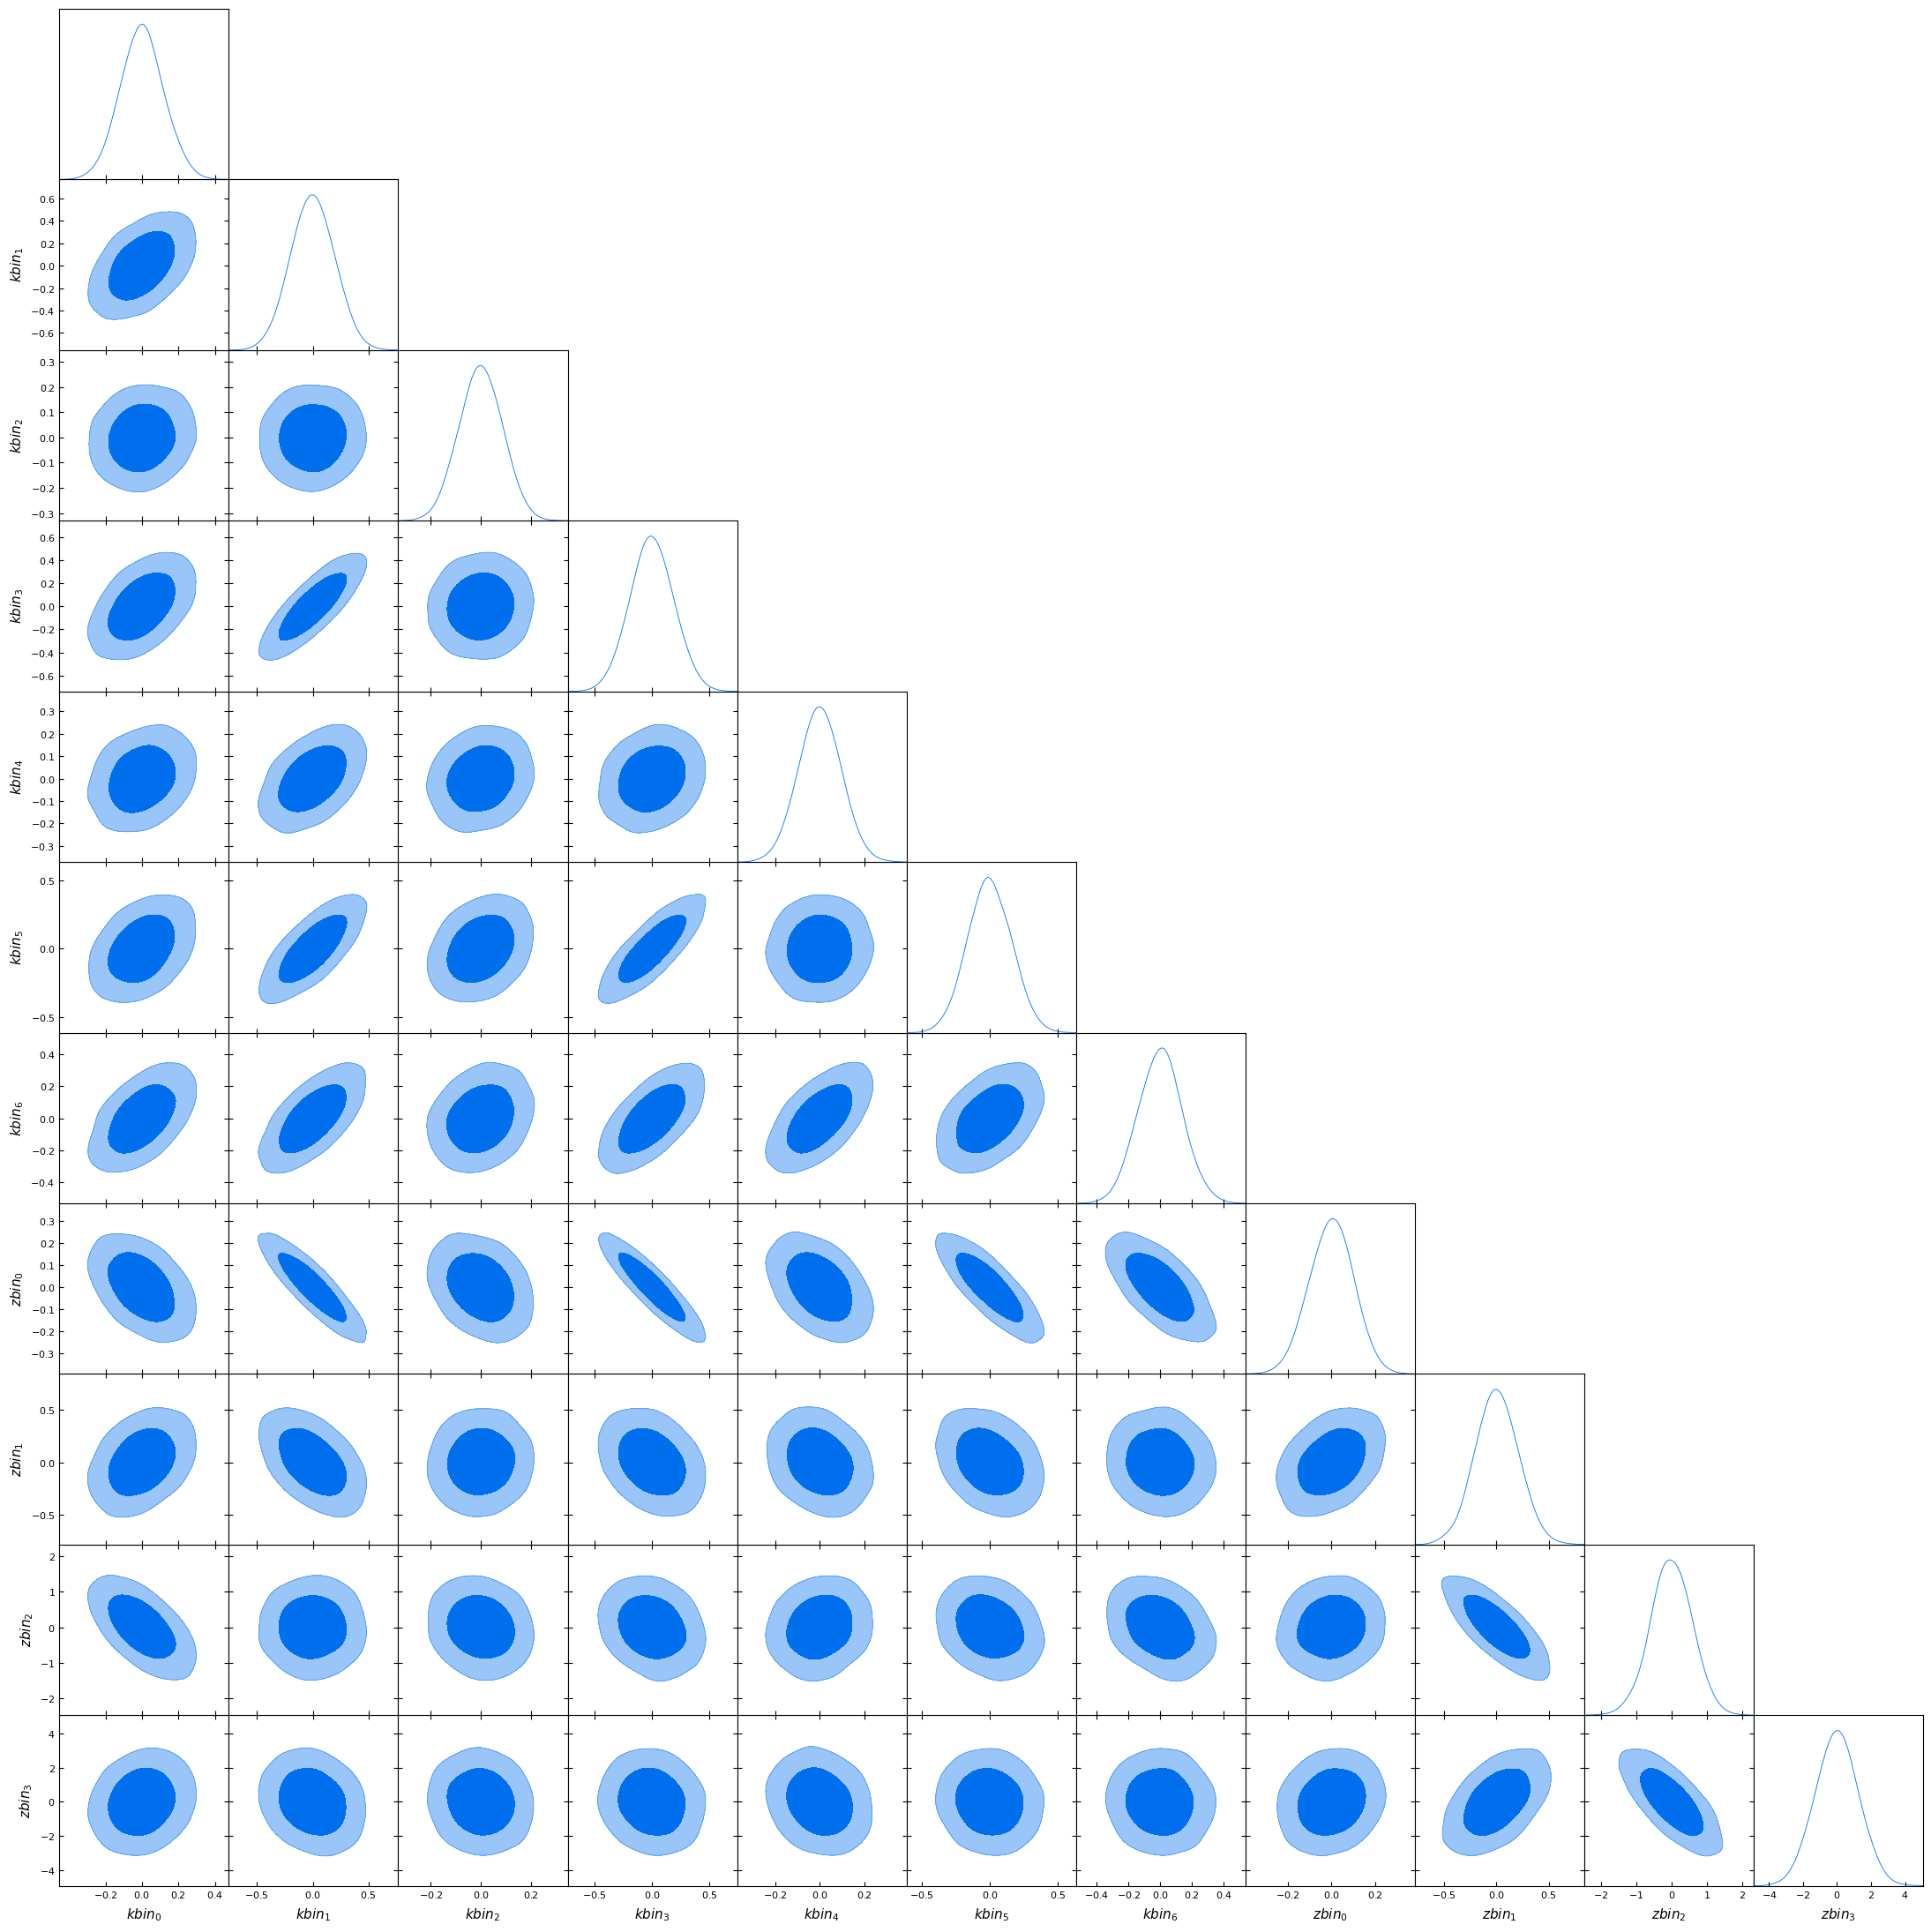

In [75]:
import getdist
import getdist.plots as gplot

cov_matrix = np.linalg.inv(fisher_matrix)

# Define parameter names (modify as needed)
param_names = [f'kbin{i}' for i in range(7)] + [f'zbin{i}' for i in range(4)]
param_labels = [f'kbin_{i}' for i in range(7)] + [f'zbin_{i}' for i in range(4)]

# Generate samples from a multivariate normal distribution
mean = np.zeros(11)  # Assume zero mean for simplicity
samples = np.random.multivariate_normal(mean, cov_matrix, size=10000)

# Create a GetDist MCSamples object using the generated samples
mc_samples = getdist.MCSamples(samples=samples, names=param_names, labels=param_labels)

# Create a corner plot
g = gplot.get_subplot_plotter()
g.triangle_plot(mc_samples, filled=True)

# Display the plot
plt.show()

In [76]:
eigenvalues, eigenvectors = np.linalg.eigh(fisher_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print the sorted eigenvalues and corresponding eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Principal components are the eigenvectors
principal_components = eigenvectors

Eigenvalues:
 [2.41981958e+03 6.59198418e+02 4.52727018e+02 2.55664656e+02
 2.43323699e+02 1.38032227e+02 1.01814782e+02 5.32880918e+01
 9.89082986e+00 5.20419529e+00 5.34154881e-01]
Eigenvectors:
 [[-0.08299766  0.15788889  0.25900441 -0.39444229 -0.52965078  0.53126265
   0.28540279 -0.24319513 -0.04761375  0.19851032  0.02173692]
 [ 0.18006804  0.0749676  -0.50035716  0.11313507  0.39085079  0.39174001
   0.220613   -0.20751701 -0.51177206  0.19603326 -0.02238018]
 [ 0.25341219  0.05920203 -0.38000472 -0.00716091 -0.39915086  0.20149726
  -0.76456194  0.01558347  0.00269307  0.0555319  -0.0033318 ]
 [ 0.33872161 -0.02168068  0.00716314  0.24039655 -0.50214107 -0.45975073
   0.26708227  0.18820535 -0.43400675  0.26124511 -0.00862298]
 [ 0.1804131  -0.45122975  0.456751    0.41552998  0.02733772  0.10938989
  -0.2018257  -0.56390561 -0.10277641  0.02023717 -0.01212452]
 [ 0.0440284   0.29068264  0.55024887  0.04608104  0.26843819  0.22680112
  -0.29281118  0.49169417 -0.33470254  0.21

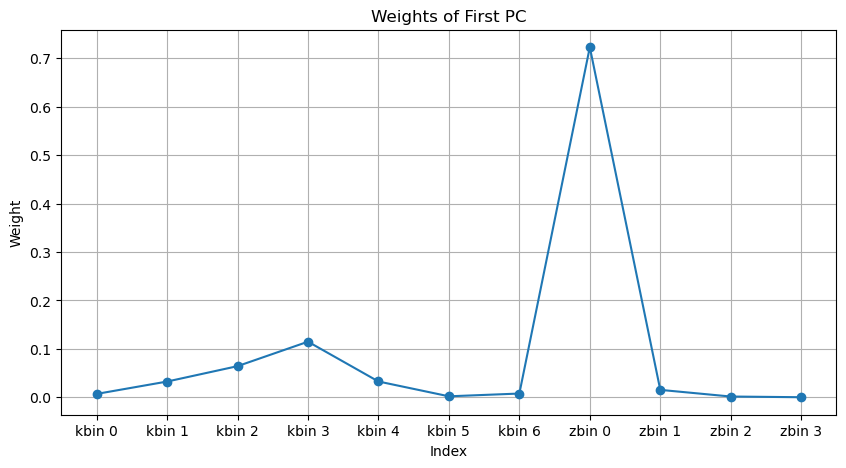

In [77]:
weights = eigenvectors[:,0] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of First PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

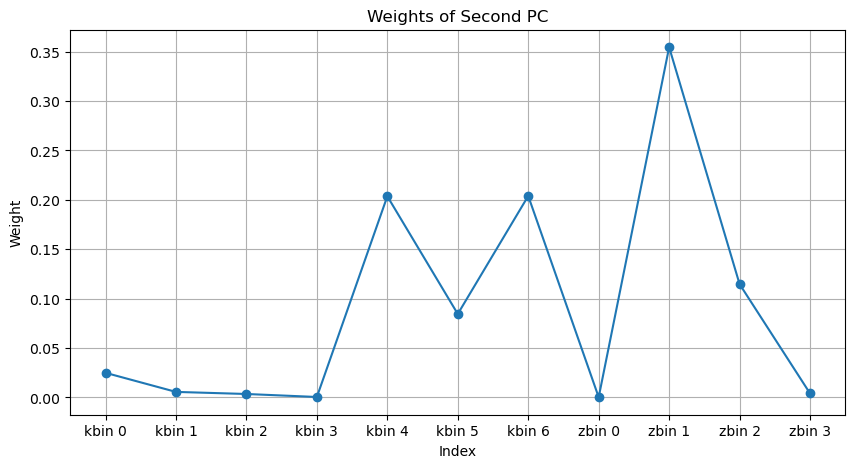

In [78]:
weights = eigenvectors[:,1] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of Second PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

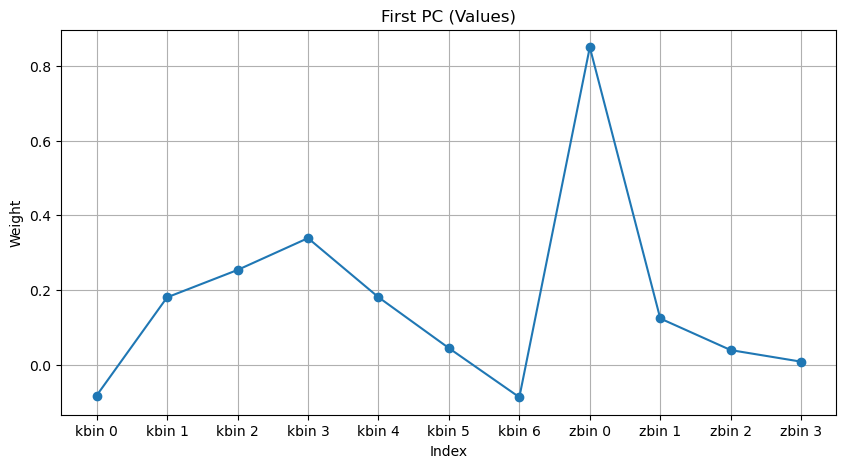

In [79]:
weights = eigenvectors[:,0]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('First PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

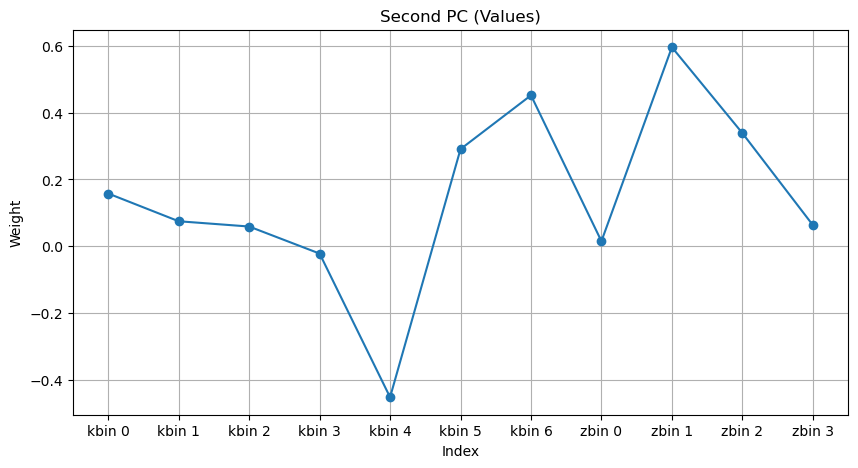

In [80]:
weights = eigenvectors[:,1]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Second PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

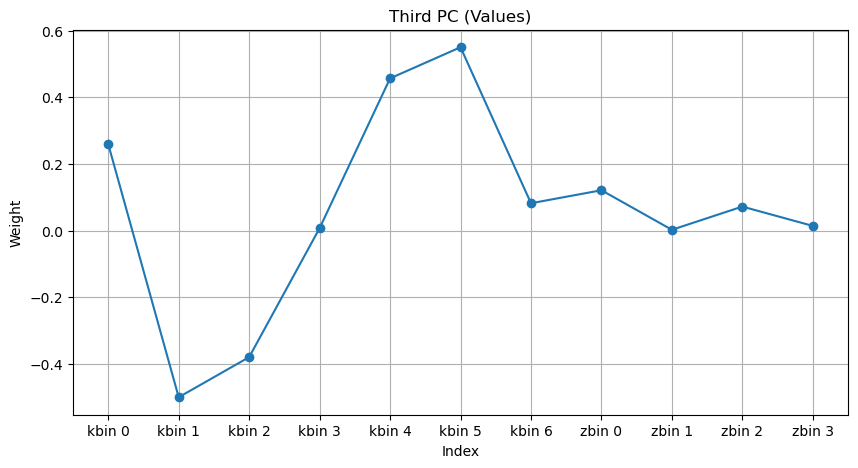

In [81]:
weights = eigenvectors[:,2]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Third PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

# DES +/- .01% Fixed Bins: 4 z bins from 0 to 0.8 and 7 k bins from 0.025 to 1.6

## To make the residual plots

In [82]:
# Loading Data 

k_bins = {}
z_bins = {}

max_val = 1.0001
min_val = 0.9999

for g_val in [max_val, min_val]:
    g_key = f'{g_val:.4f}'
    for k in range(7):
        k_bins[f'{g_key}_{k}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{g_val}kbin{k}.modelvector')

for gnew_val in [max_val, min_val]:
    gnew_key = f'{gnew_val:.4f}'
    for z in range(4):
        z_bins[f'{gnew_key}_{z}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{gnew_key}zbin{z}.modelvector')

In [83]:
# Initialize lists for k and z bins
k_lists = {f'k{i}_list': np.zeros(400) for i in range(7)}
z_lists = {f'z{i}_list': np.zeros(400) for i in range(4)}

denom = max_val - min_val

# Populate k and z lists with calculations
for i in range(400):
    for k in range(7):
        k_lists[f'k{k}_list'][i] = (k_bins[f'1.0001_{k}'][i][1] - k_bins[f'0.9999_{k}'][i][1]) / denom
    for k in range(4):
        z_lists[f'z{k}_list'][i] = (z_bins[f'1.0001_{k}'][i][1] - z_bins[f'0.9999_{k}'][i][1]) / denom

# Initialize residuals for k and z bins
resid_z = {f'resid_z{i}': np.zeros((400, 2)) for i in range(4)}
resid_k = {f'resid_k{i}': np.zeros((400, 2)) for i in range(7)}

# Calculate residuals
for i in range(400):
    for j in range(4):
        resid_z[f'resid_z{j}'][i] = [i, (z_bins[f'1.0001_{j}'][i][1] - z_bins[f'0.9999_{j}'][i][1]) / z_bins[f'0.9999_{j}'][i][1]]
    for j in range(7):
        resid_k[f'resid_k{j}'][i] = [i, (k_bins[f'1.0001_{j}'][i][1] - k_bins[f'0.9999_{j}'][i][1]) / k_bins[f'0.9999_{j}'][i][1]]

In [84]:
residuals_list = [resid_k[f'resid_k{i}'] for i in range(7)] + [resid_z[f'resid_z{i}'] for i in range(4)]

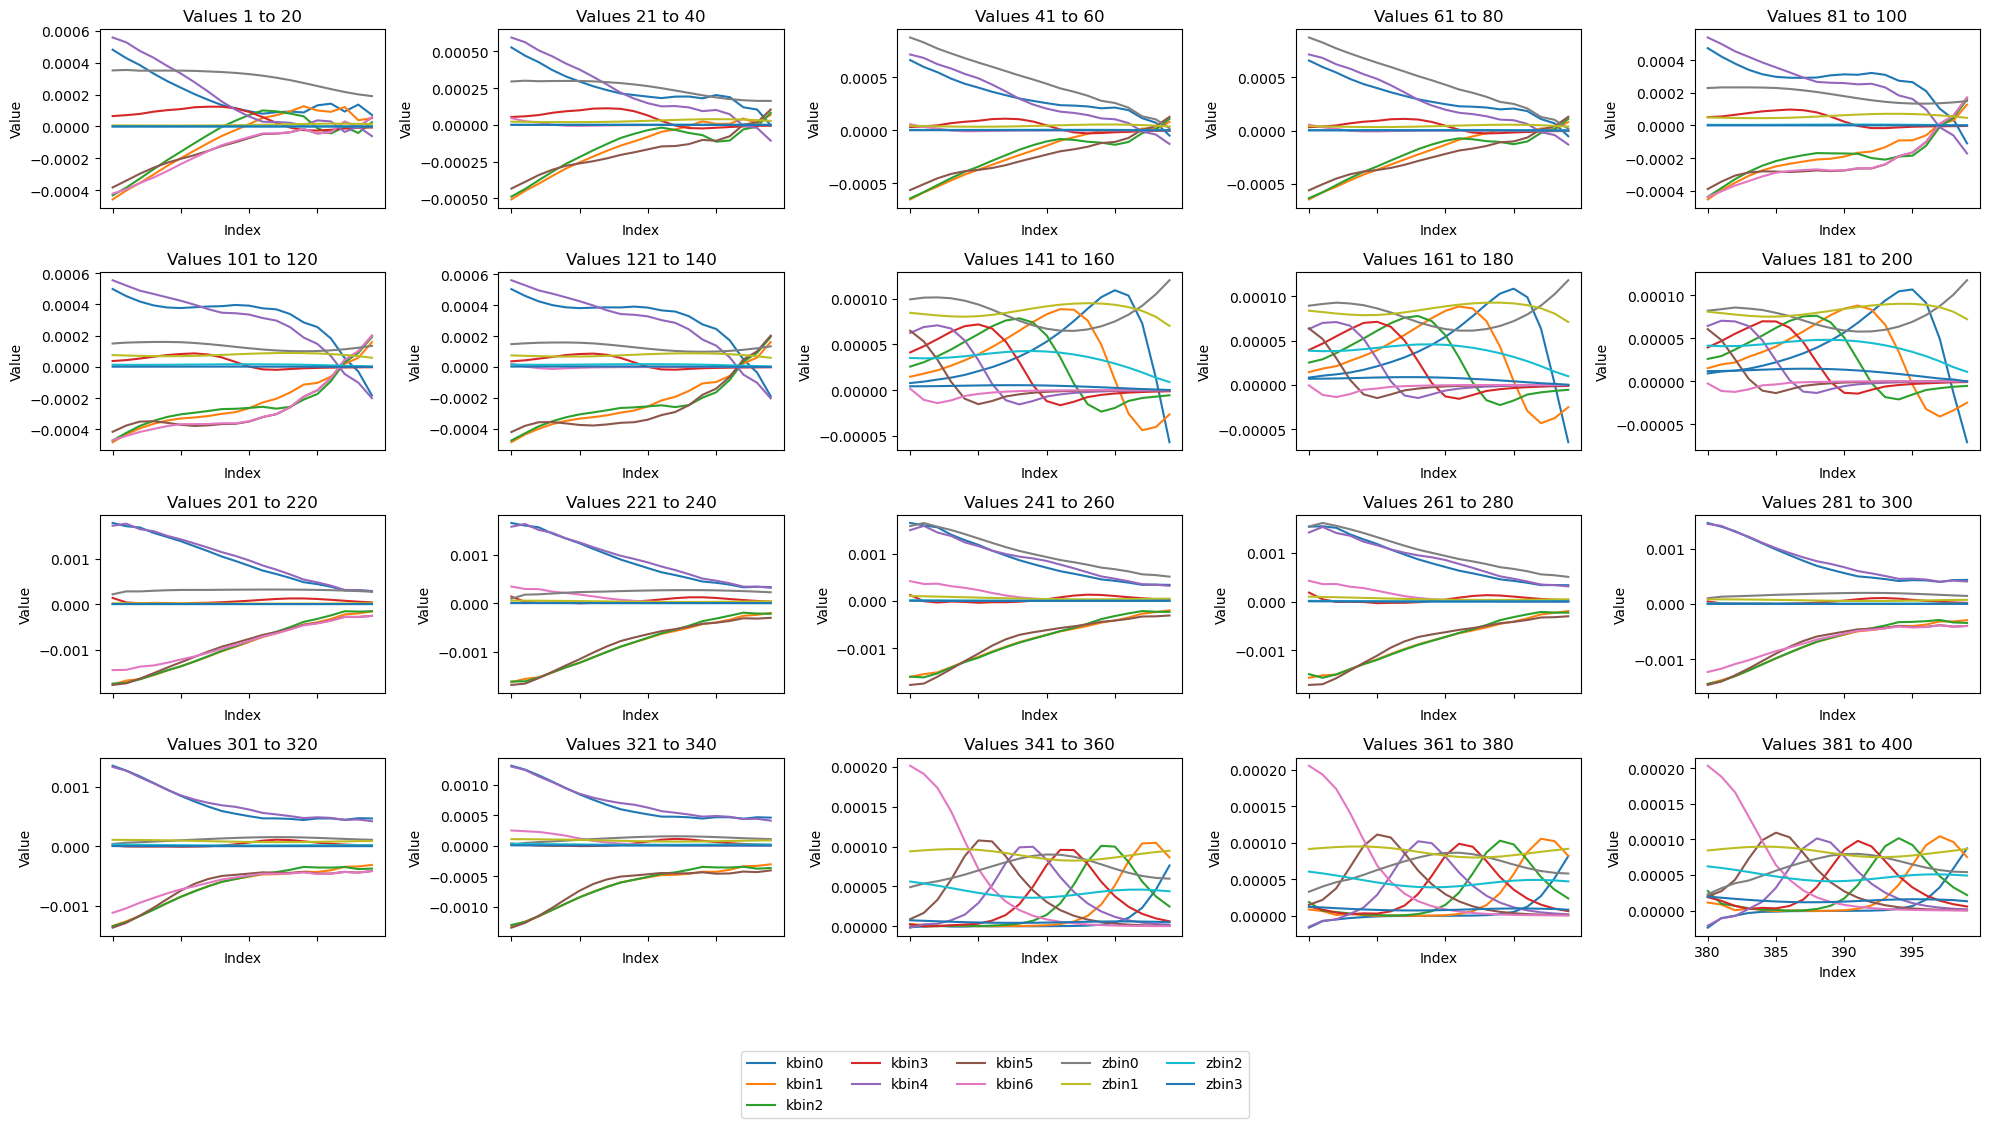

In [85]:
# full residuals

data = residuals_list

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

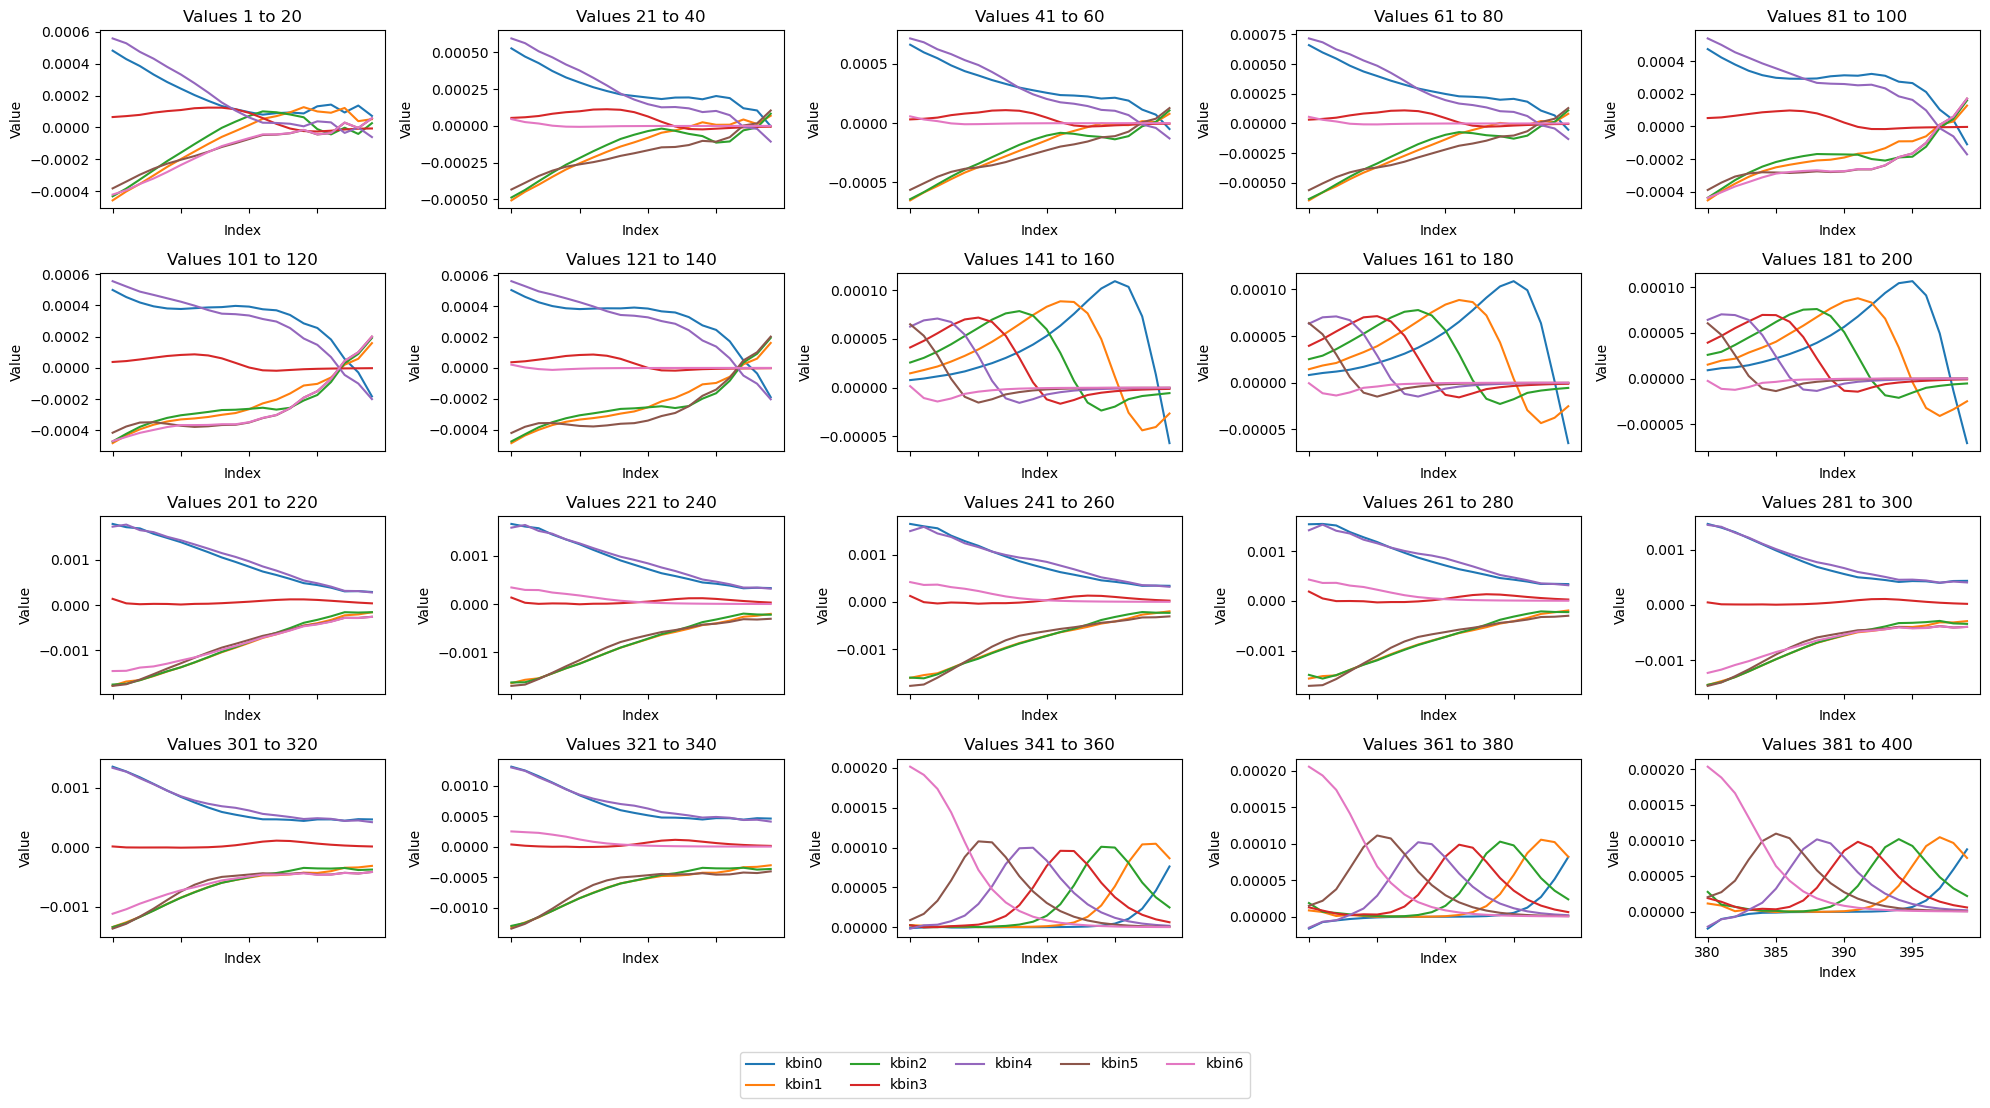

In [86]:
# k residuals only

data = [resid_k[f'resid_k{i}'] for i in range(7)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

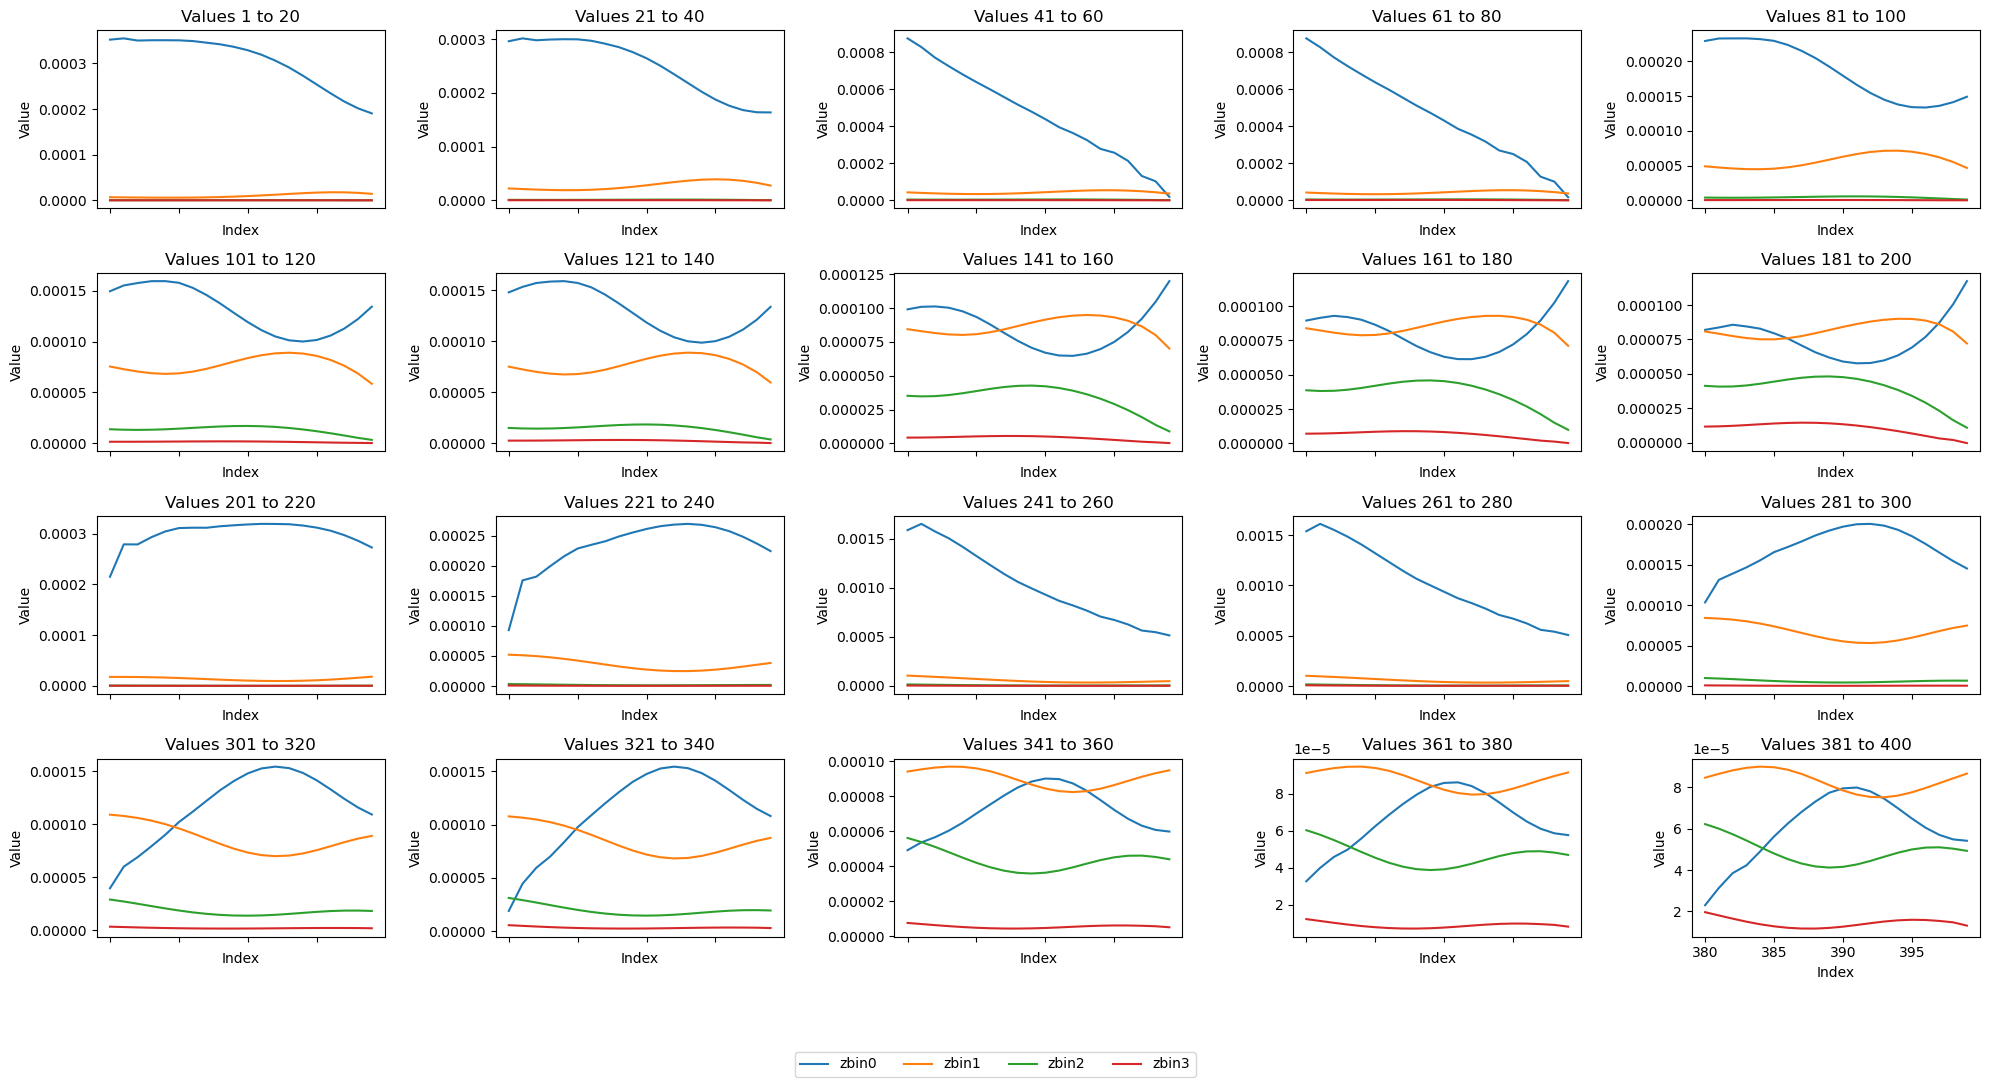

In [87]:
# z residuals only

data = [resid_z[f'resid_z{i}'] for i in range(4)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'zbin{i}'
        else:
            label = f'zbin{i - 5}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Make Fisher, Corner Plots, PCA

In [88]:
derivatives = np.array([*k_lists.values(), *z_lists.values()])

derivatives

array([[ 9.12095000e-05,  6.92435000e-05,  5.22945000e-05, ...,
         2.99750000e-07,  4.52550000e-07,  5.47900000e-07],
       [-8.67225000e-05, -6.49595000e-05, -4.81130000e-05, ...,
         9.57450000e-07,  7.36950000e-07,  4.72200000e-07],
       [-8.18870000e-05, -6.20170000e-05, -4.43890000e-05, ...,
         4.43200000e-07,  2.49650000e-07,  1.36750000e-07],
       ...,
       [ 1.28150000e-06,  1.04000000e-06,  8.33000000e-07, ...,
         7.50750000e-07,  6.44000000e-07,  5.42300000e-07],
       [ 2.35000000e-08,  1.95000000e-08,  1.60000000e-08, ...,
         4.67100000e-07,  3.84700000e-07,  3.08650000e-07],
       [ 1.25000000e-08,  9.99999999e-09,  8.99999999e-09, ...,
         1.41400000e-07,  1.12850000e-07,  8.25000000e-08]],
      shape=(11, 400))

In [89]:
num_params = derivatives.shape[0]
fisher_matrix = np.zeros((num_params, num_params))

# Construct the Fisher matrix
for i in range(num_params):
    for j in range(num_params):
        fisher_matrix[i, j] = derivatives[i, :] @ masked_inv_cov @ derivatives[j, :]

print("Fisher Matrix:\n", fisher_matrix)

Fisher Matrix:
 [[ 1.49286224e+04 -1.50421242e+04 -1.48677887e+04  5.48507166e+02
   1.59191627e+04 -1.39897379e+04 -5.52307226e+03  7.20284065e+03
   3.97929331e+02 -2.45333284e+02 -5.70567936e+01]
 [-1.50421242e+04  1.54237754e+04  1.52024421e+04 -5.20343315e+02
  -1.61493471e+04  1.41576495e+04  5.45063752e+03 -7.22762983e+03
  -2.99978465e+02  3.04134938e+02  6.84487094e+01]
 [-1.48677887e+04  1.52024421e+04  1.51741054e+04 -3.35535933e+02
  -1.58845614e+04  1.39469020e+04  5.30626305e+03 -6.92434557e+03
  -2.67285681e+02  3.15665387e+02  7.14393021e+01]
 [ 5.48507166e+02 -5.20343315e+02 -3.35535933e+02  3.93559895e+02
   8.08144176e+02 -5.11759151e+02 -3.67308043e+02  7.38824310e+02
   1.29856379e+02  5.13819304e+01  1.07899424e+01]
 [ 1.59191627e+04 -1.61493471e+04 -1.58845614e+04  8.08144176e+02
   1.73898868e+04 -1.47994929e+04 -5.95690640e+03  8.15973369e+03
   5.31806130e+02 -2.12173544e+02 -5.08745686e+01]
 [-1.39897379e+04  1.41576495e+04  1.39469020e+04 -5.11759151e+02
  -

Removed no burn in


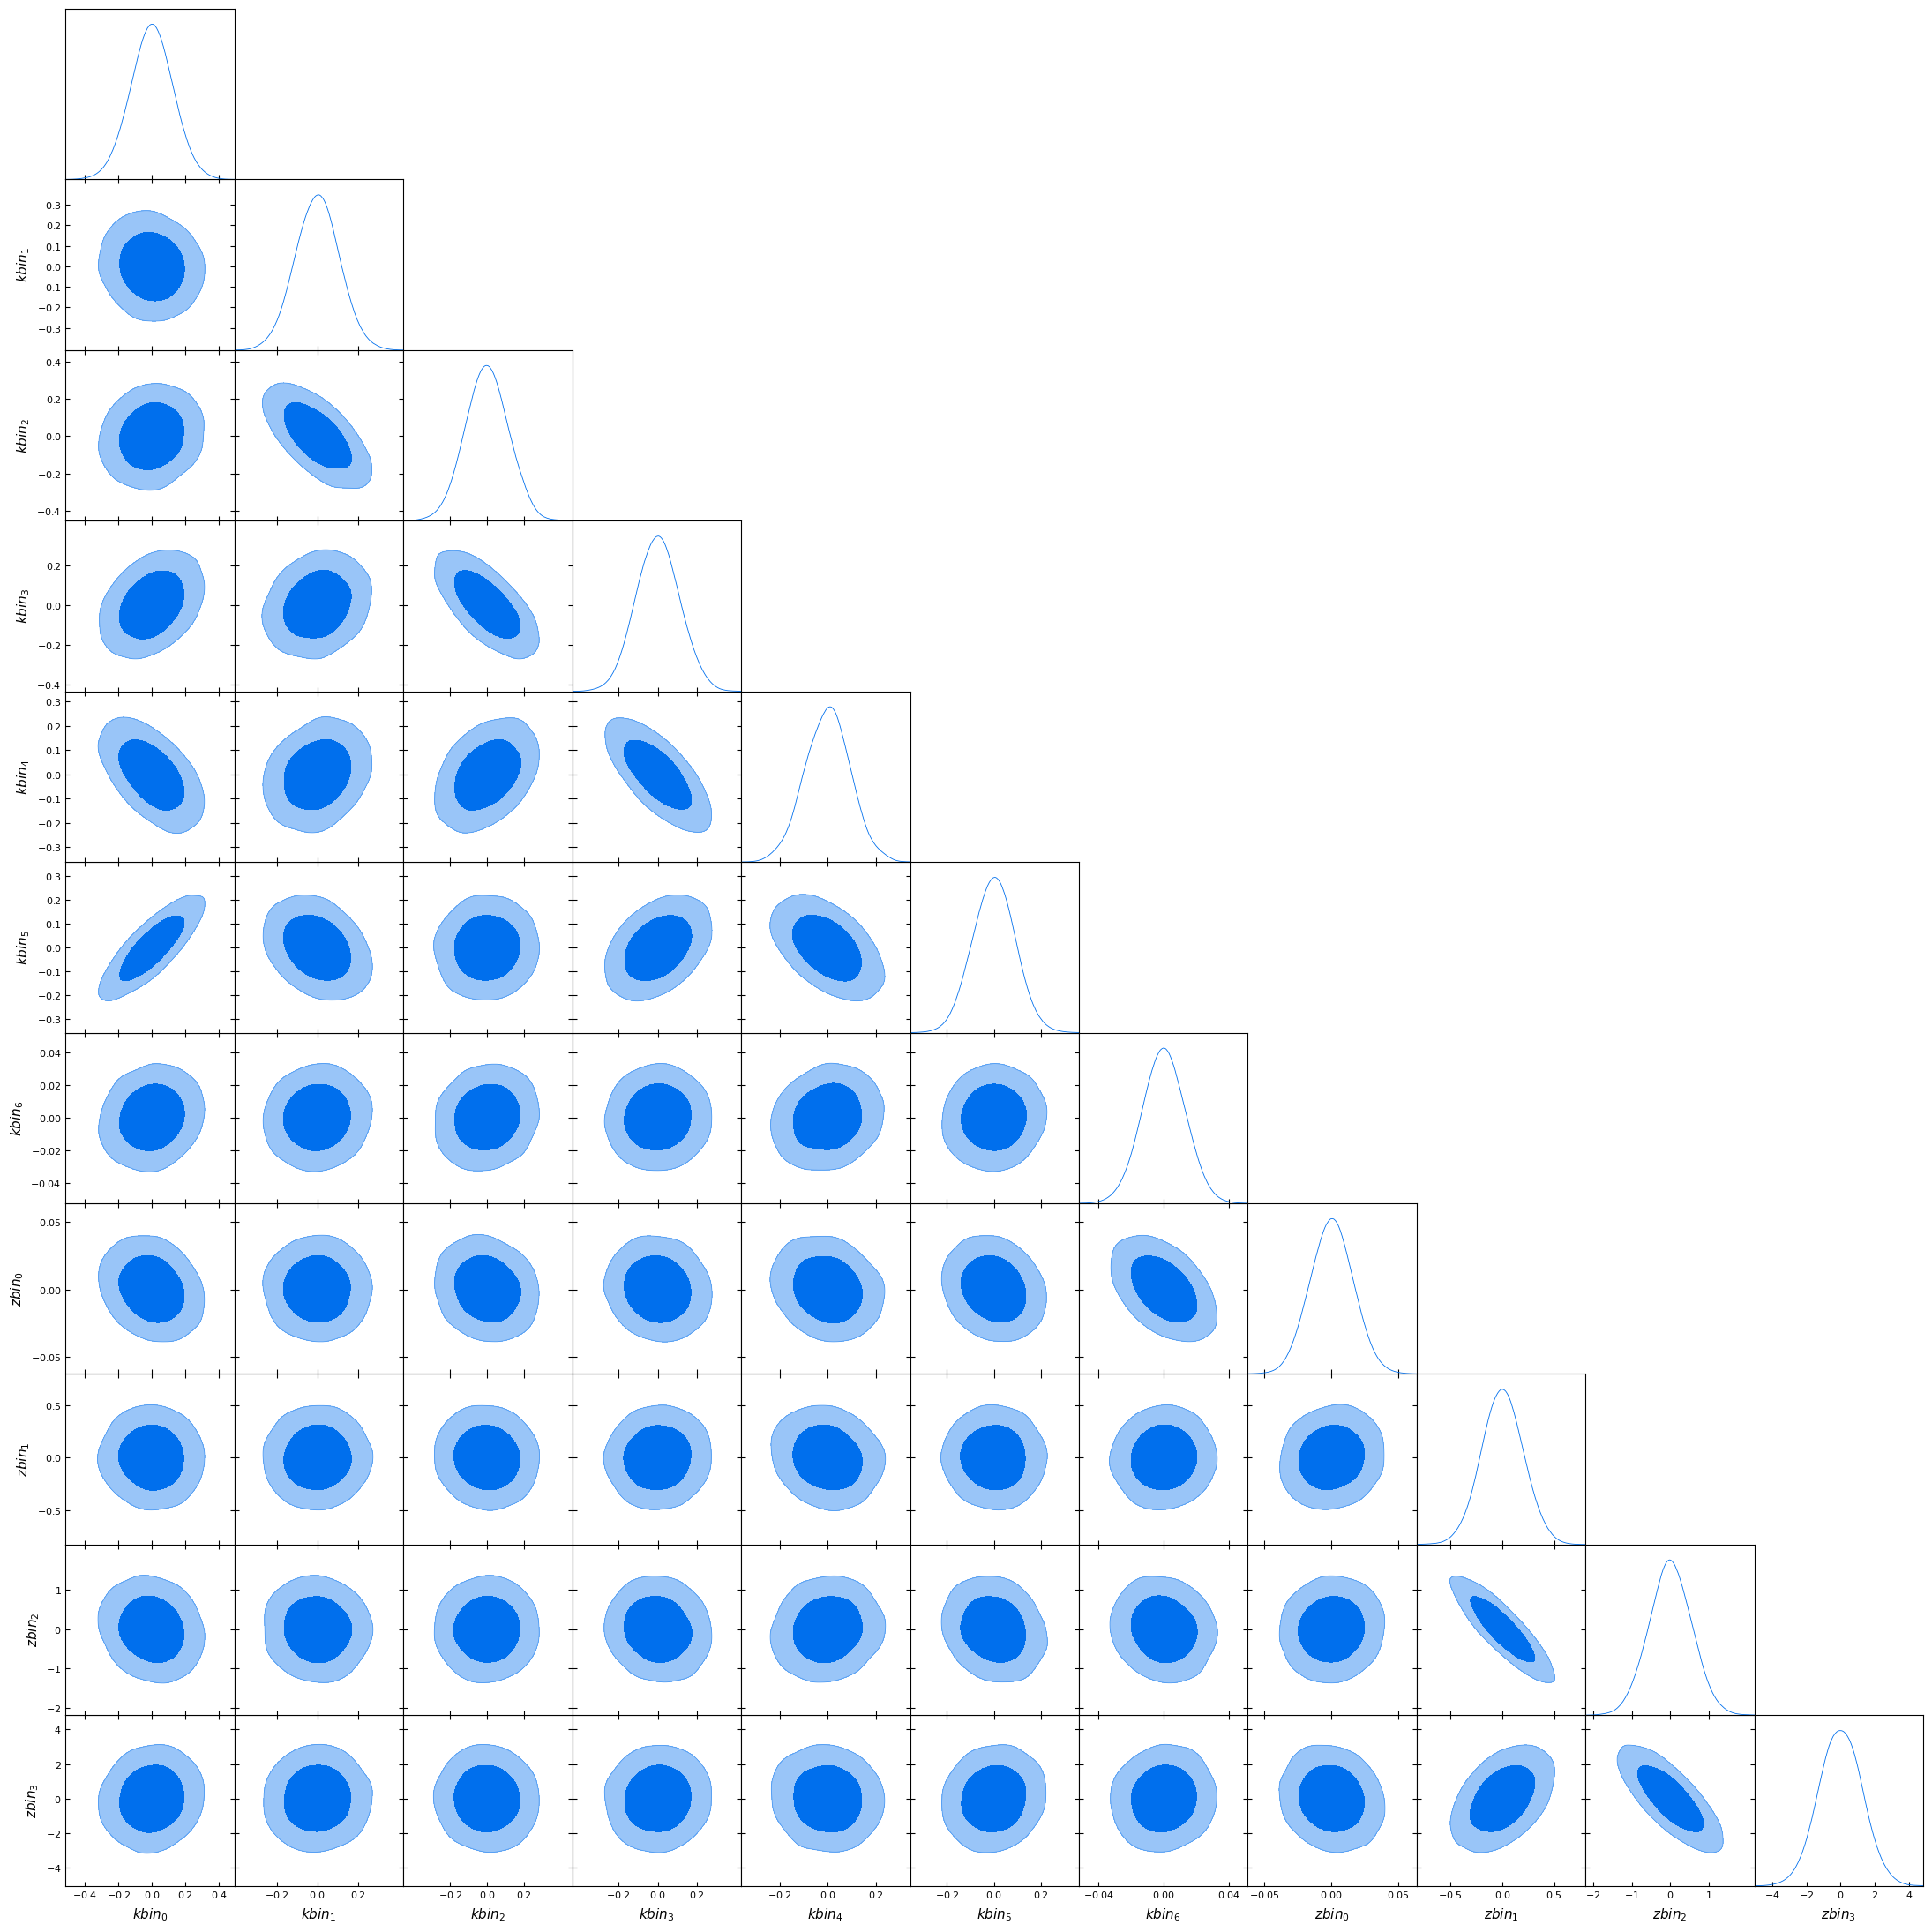

In [90]:
import getdist
import getdist.plots as gplot

cov_matrix = np.linalg.inv(fisher_matrix)

# Define parameter names (modify as needed)
param_names = [f'kbin{i}' for i in range(7)] + [f'zbin{i}' for i in range(4)]
param_labels = [f'kbin_{i}' for i in range(7)] + [f'zbin_{i}' for i in range(4)]

# Generate samples from a multivariate normal distribution
mean = np.zeros(11)  # Assume zero mean for simplicity
samples = np.random.multivariate_normal(mean, cov_matrix, size=10000)

# Create a GetDist MCSamples object using the generated samples
mc_samples = getdist.MCSamples(samples=samples, names=param_names, labels=param_labels)

# Create a corner plot
g = gplot.get_subplot_plotter()
g.triangle_plot(mc_samples, filled=True)

# Display the plot
plt.show()

In [91]:
eigenvalues, eigenvectors = np.linalg.eigh(fisher_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print the sorted eigenvalues and corresponding eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Principal components are the eigenvectors
principal_components = eigenvectors

Eigenvalues:
 [8.11872886e+04 9.25669637e+03 4.11426708e+03 7.56515055e+02
 4.10405356e+02 2.49207398e+02 9.12046187e+01 3.96277226e+01
 3.25877012e+01 7.02883848e+00 5.55891476e-01]
Eigenvectors:
 [[ 4.27039541e-01 -4.75193896e-03 -1.03349428e-01 -6.91857990e-02
   1.15599822e-01 -3.93255151e-01 -4.01129434e-01  4.15189794e-01
  -5.47581650e-01  3.05913069e-02  8.06584886e-03]
 [-4.33474585e-01 -2.97834071e-03  1.50699883e-01 -7.13396634e-02
   1.07682119e-01 -2.54789902e-01 -6.58235852e-01 -5.19945542e-01
  -6.29897589e-02  1.36935106e-02  2.17995057e-03]
 [-4.27537866e-01  5.10559005e-03  2.09936848e-01 -2.29247826e-01
   4.76890976e-01 -2.06060123e-02 -8.33952919e-02  6.25848880e-01
   3.06648684e-01 -5.27991328e-03 -2.18205940e-03]
 [ 1.73546928e-02  1.84548602e-02  1.28677670e-01 -4.37482673e-01
   4.82922879e-01  4.03075210e-01  2.43922943e-01 -2.60121520e-01
  -5.17475751e-01  2.77361716e-02  3.60733549e-03]
 [ 4.59354501e-01  2.25404947e-02 -9.24398014e-03 -4.96057342e-01
  -1

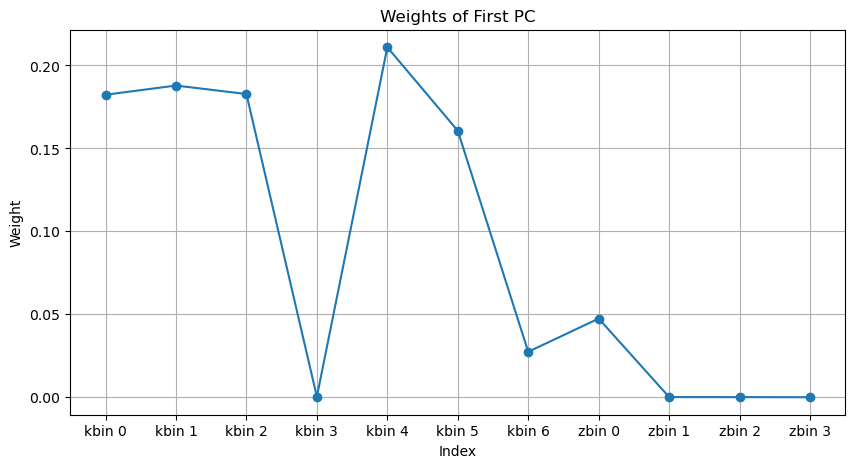

In [92]:
weights = eigenvectors[:,0] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of First PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

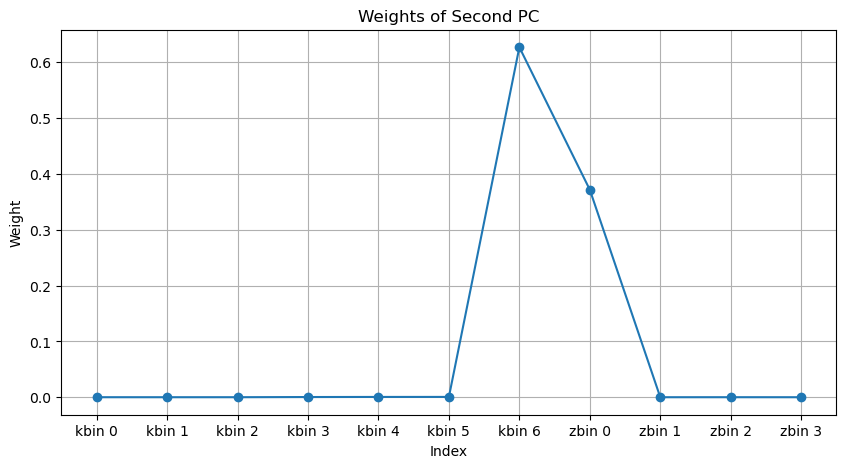

In [93]:
weights = eigenvectors[:,1] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of Second PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

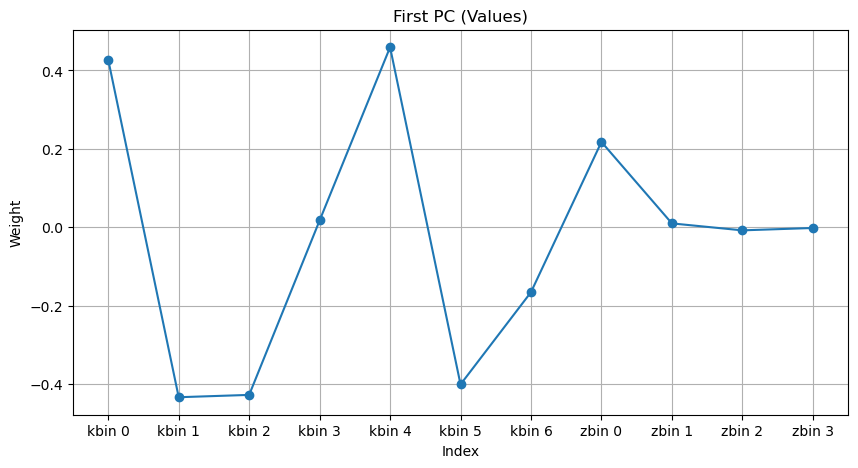

In [94]:
weights = eigenvectors[:,0]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('First PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

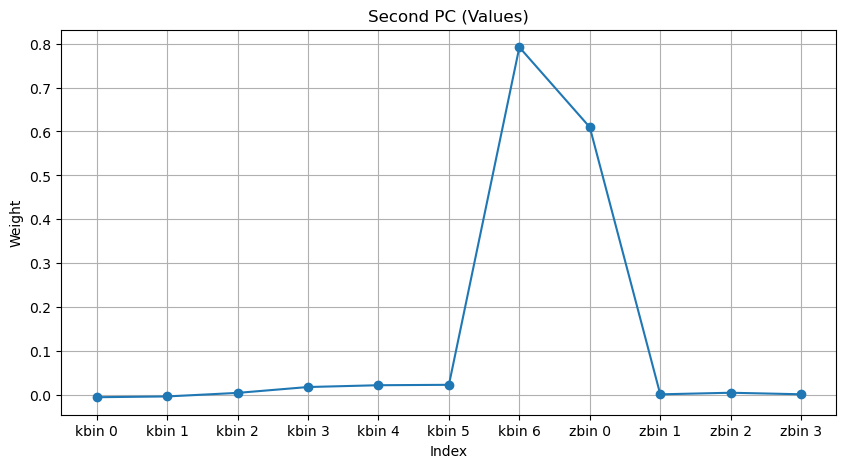

In [95]:
weights = eigenvectors[:,1]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Second PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

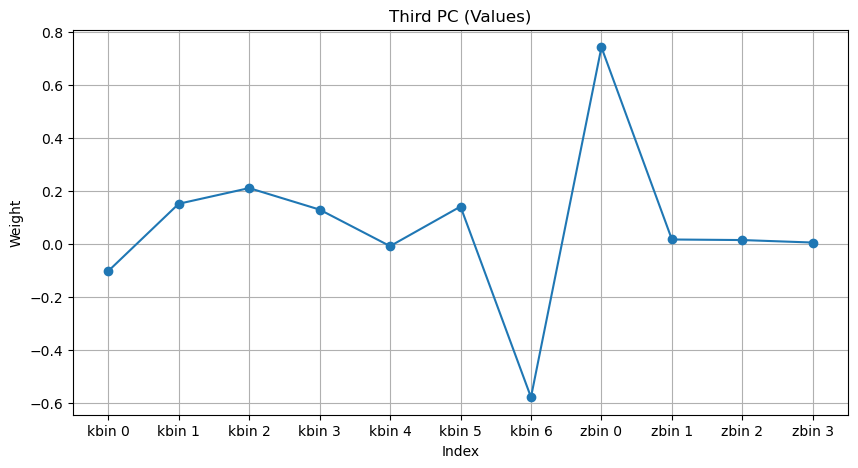

In [96]:
weights = eigenvectors[:,2]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Third PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

In [97]:
# Test to see what estimation looks like on the 0.01 percent, technically this uses the optimal model from the 1 percent but the 
# estimation ought not to be too far off, let us test and then see
# OK, post testing, this is clearly much worse than either of the other two cases, we can push from the .1 percent differences and see...

from scipy.optimize import minimize


sup_optimal_full = [0.00895256, 0.01500445, 0.01958794, 0.02452636, 0.02981562, 0.02564244,
 0.01614082, 0.0335147,  0.06966564, 0.0334822,  0.00578661]

def chi_square(params):
    csq = 0
    for i in range(4):
        csq += eigenvalues[i] * np.sum(params*eigenvectors[:,i]) ** 2
    return csq

csqLCDM = chi_square(sup_optimal_full)

print("LCDM estimation of csq is:", csqLCDM)

alpha = np.array(sup_optimal_full)
#beta model
def beta_chi_square(beta):
    csq = 0
    alphaOne = np.array([0] * 7 + [0.1,0.3,0.5,0.7])
    for i in range(7, 11):
        alphaOne[i] = beta / (0.7 + 0.3 * (1+alphaOne[i])**3)
    delta_alpha = alpha - alphaOne
    for i in range(4):
        csq += eigenvalues[i] * np.sum(delta_alpha*eigenvectors[:,i]) ** 2
    return csq


initial_guess = [0]

result = minimize(beta_chi_square, initial_guess, method='L-BFGS-B')

print("Optimal beta:", result.x)
print("Minimum value of beta_chi_square:", result.fun)

LCDM estimation of csq is: 20.73027638083708
Optimal beta: [0.03143869]
Minimum value of beta_chi_square: 12.502920381154892


/var/folders/3m/40whbbgn3j3dj_4wmy4p6sy00000gn/T/ipykernel_20827/417362997.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphaOne[i] = beta / (0.7 + 0.3 * (1+alphaOne[i])**3)


# DES +/- 1% Fixed Bins: 4 z bins from 0 to 0.8 and 7 k bins from 0.025 to 1.6 (using this as a derivative comparison to the first case, the previous case was too numerically instable via inspection)

In [98]:
# Loading Data 

k_bins = {}
z_bins = {}

max_val = 1.01
min_val = 0.99

for g_val in [max_val, min_val]:
    g_key = f'{g_val:.2f}'
    for k in range(7):
        k_bins[f'{g_key}_{k}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{g_val}kbin{k}.modelvector')

for gnew_val in [max_val, min_val]:
    gnew_key = f'{gnew_val:.2f}'
    for z in range(4):
        z_bins[f'{gnew_key}_{z}'] = np.loadtxt(f'data/DES_oneXi_newSmoothing_As199_Data/{gnew_key}zbin{z}.modelvector')

In [99]:
# Initialize lists for k and z bins
k_lists = {f'k{i}_list': np.zeros(400) for i in range(7)}
z_lists = {f'z{i}_list': np.zeros(400) for i in range(4)}

denom = max_val - min_val

# Populate k and z lists with calculations
for i in range(400):
    for k in range(7):
        k_lists[f'k{k}_list'][i] = (k_bins[f'1.01_{k}'][i][1] - k_bins[f'0.99_{k}'][i][1]) / denom
    for k in range(4):
        z_lists[f'z{k}_list'][i] = (z_bins[f'1.01_{k}'][i][1] - z_bins[f'0.99_{k}'][i][1]) / denom

# Initialize residuals for k and z bins
resid_z = {f'resid_z{i}': np.zeros((400, 2)) for i in range(4)}
resid_k = {f'resid_k{i}': np.zeros((400, 2)) for i in range(7)}

# Calculate residuals
for i in range(400):
    for j in range(4):
        resid_z[f'resid_z{j}'][i] = [i, (z_bins[f'1.01_{j}'][i][1] - z_bins[f'0.99_{j}'][i][1]) / z_bins[f'0.99_{j}'][i][1]]
    for j in range(7):
        resid_k[f'resid_k{j}'][i] = [i, (k_bins[f'1.01_{j}'][i][1] - k_bins[f'0.99_{j}'][i][1]) / k_bins[f'0.99_{j}'][i][1]]


In [100]:
residuals_list = [resid_k[f'resid_k{i}'] for i in range(7)] + [resid_z[f'resid_z{i}'] for i in range(4)]

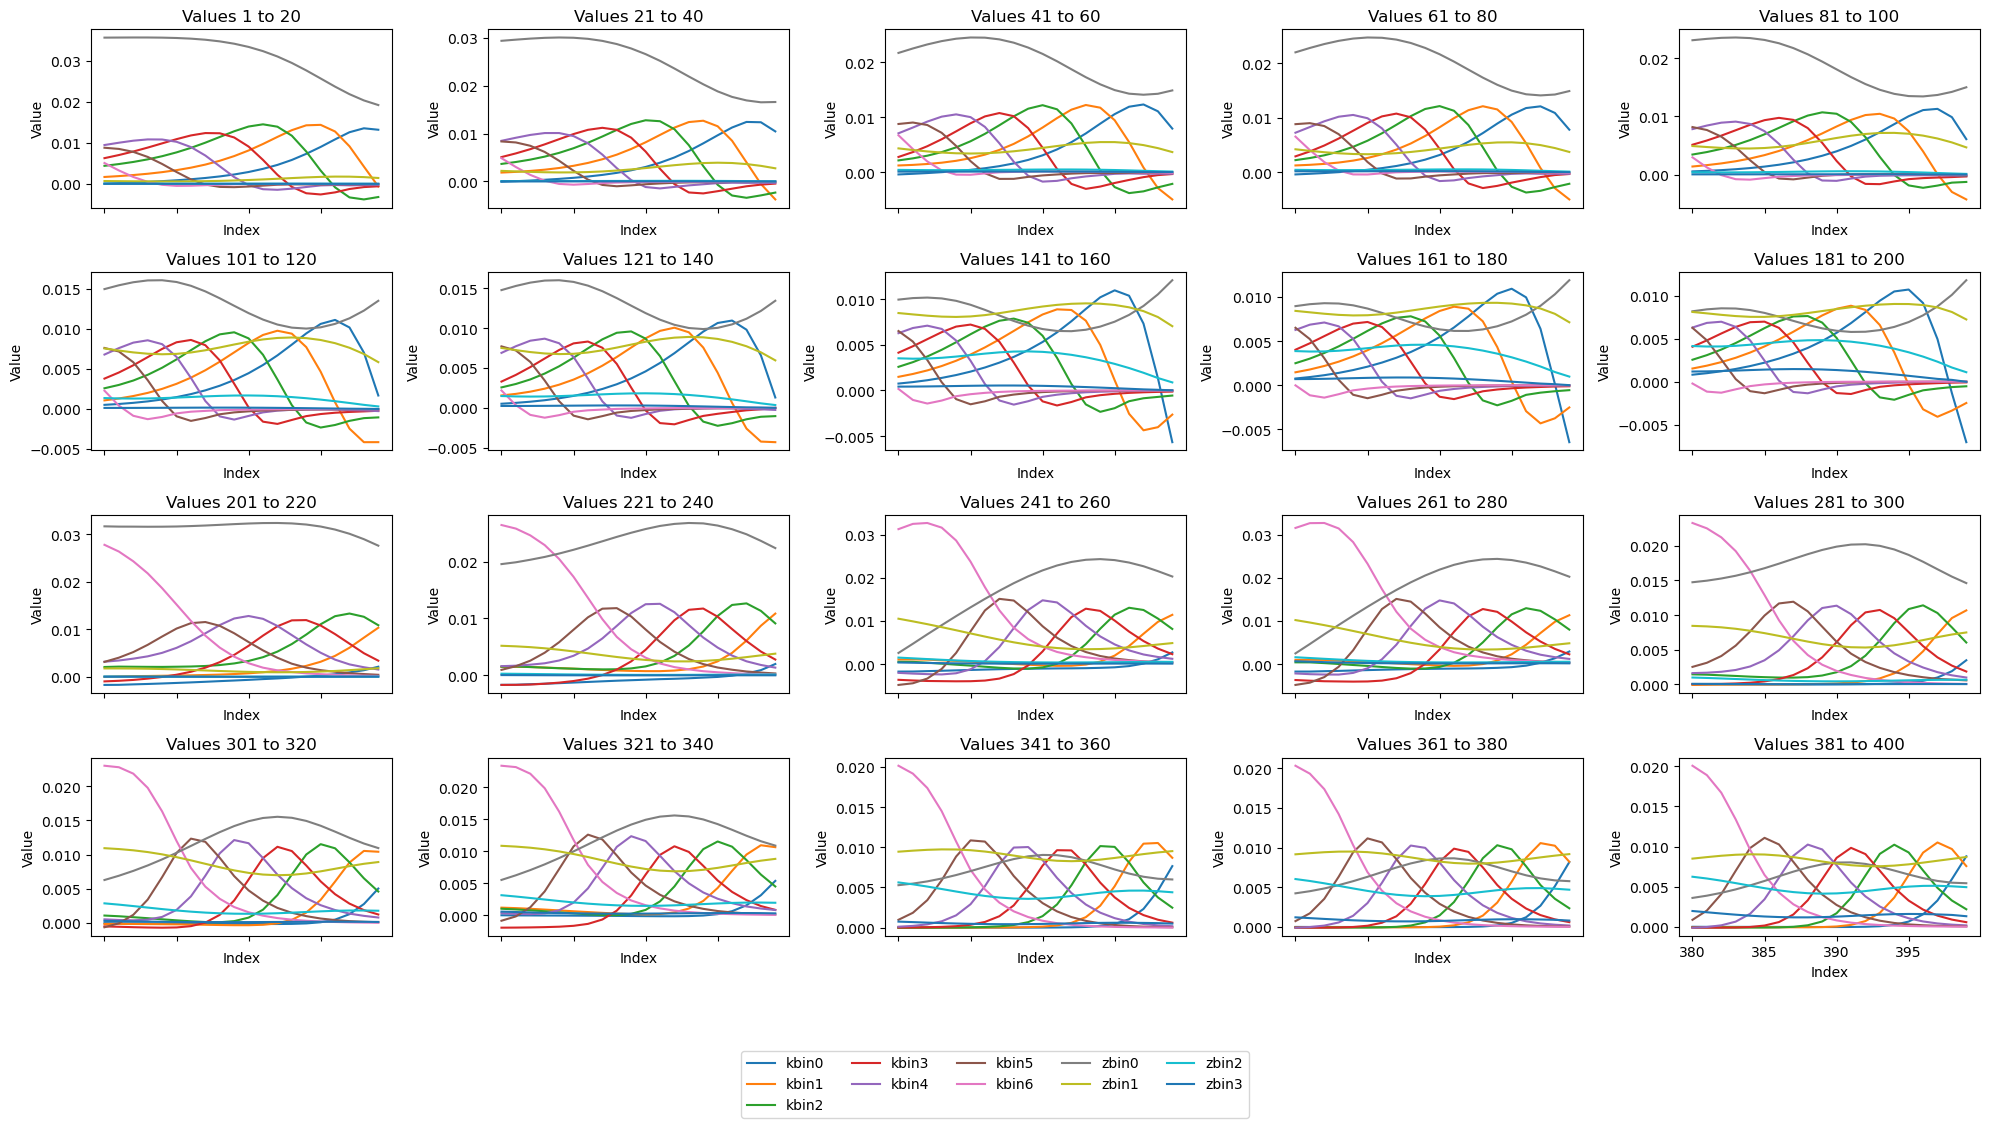

In [101]:
# full residuals

data = residuals_list

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

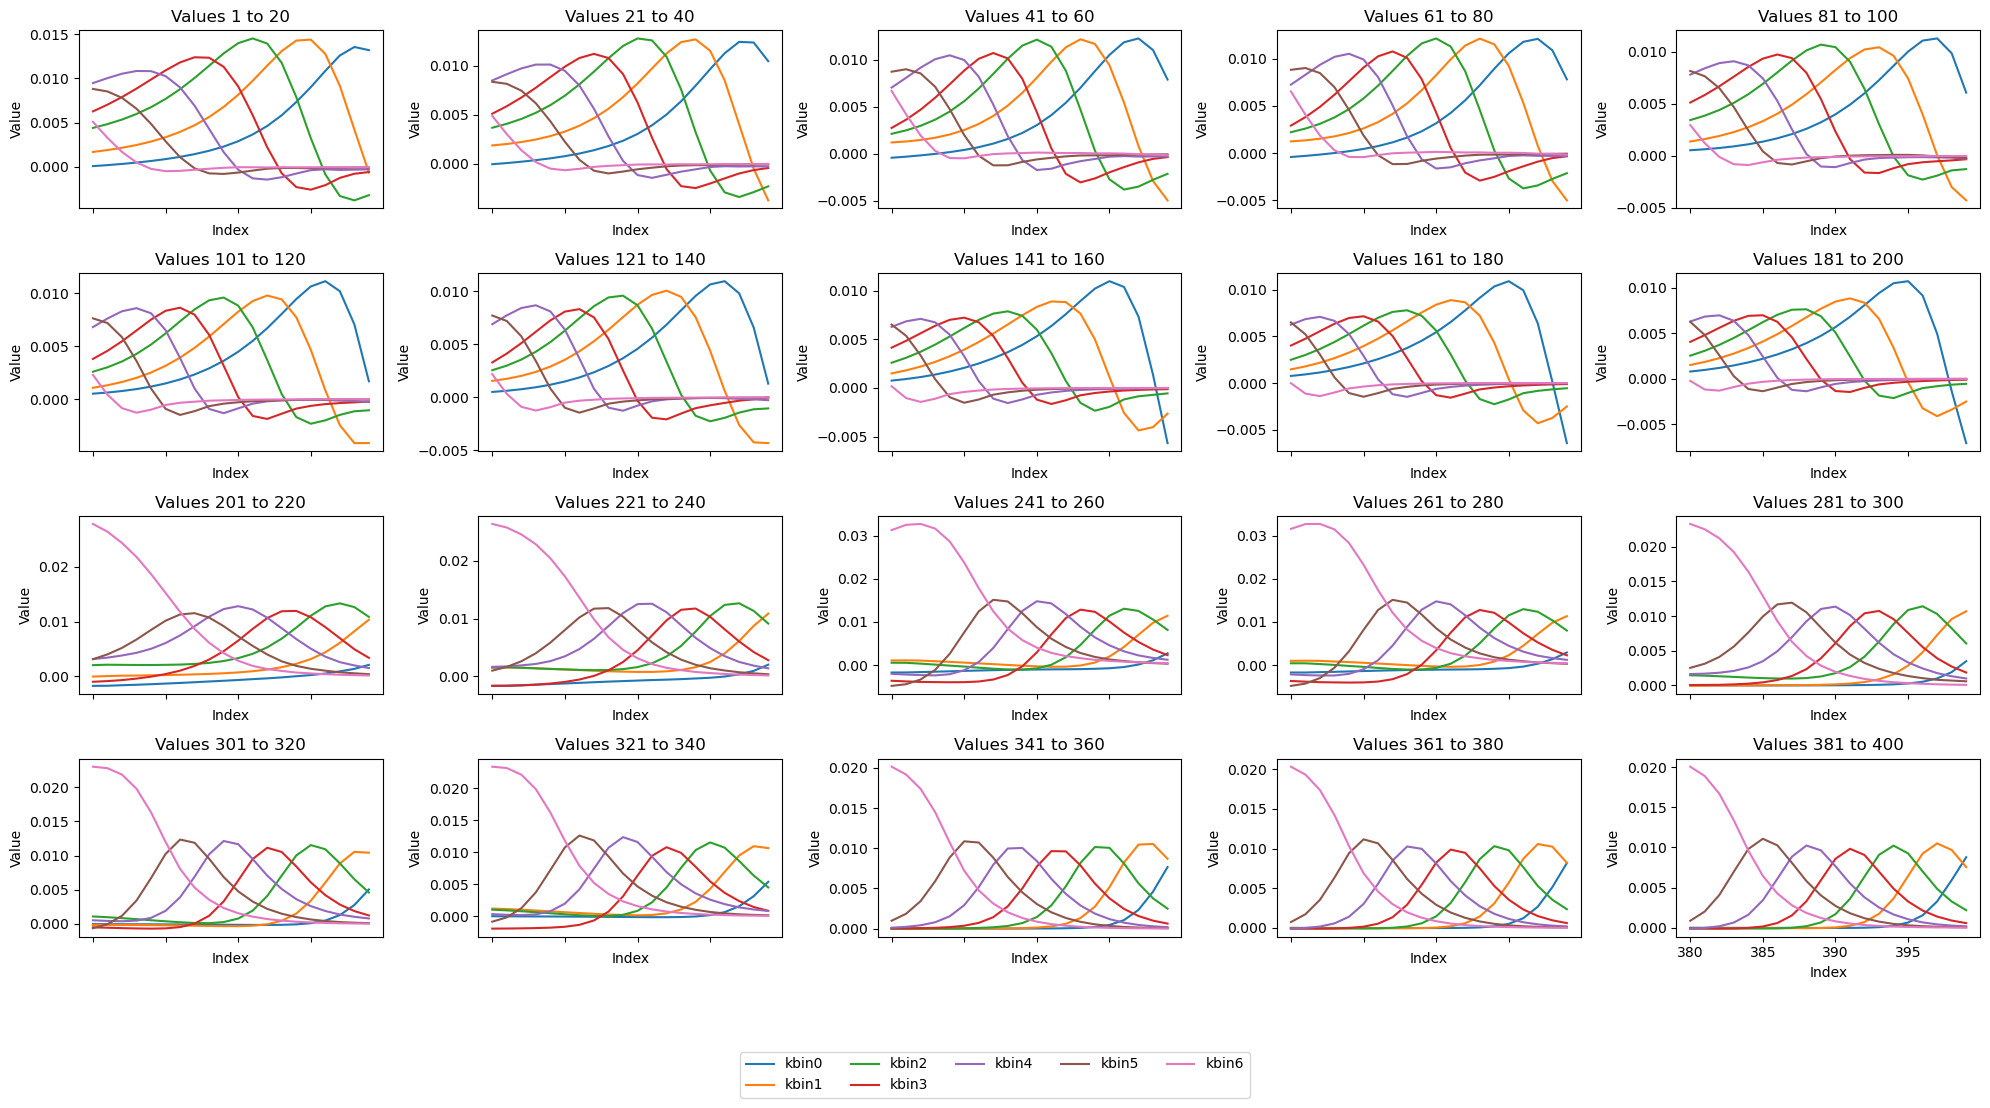

In [102]:
# k residuals only

data = [resid_k[f'resid_k{i}'] for i in range(7)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'kbin{i}'
        else:
            label = f'zbin{i - 7}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

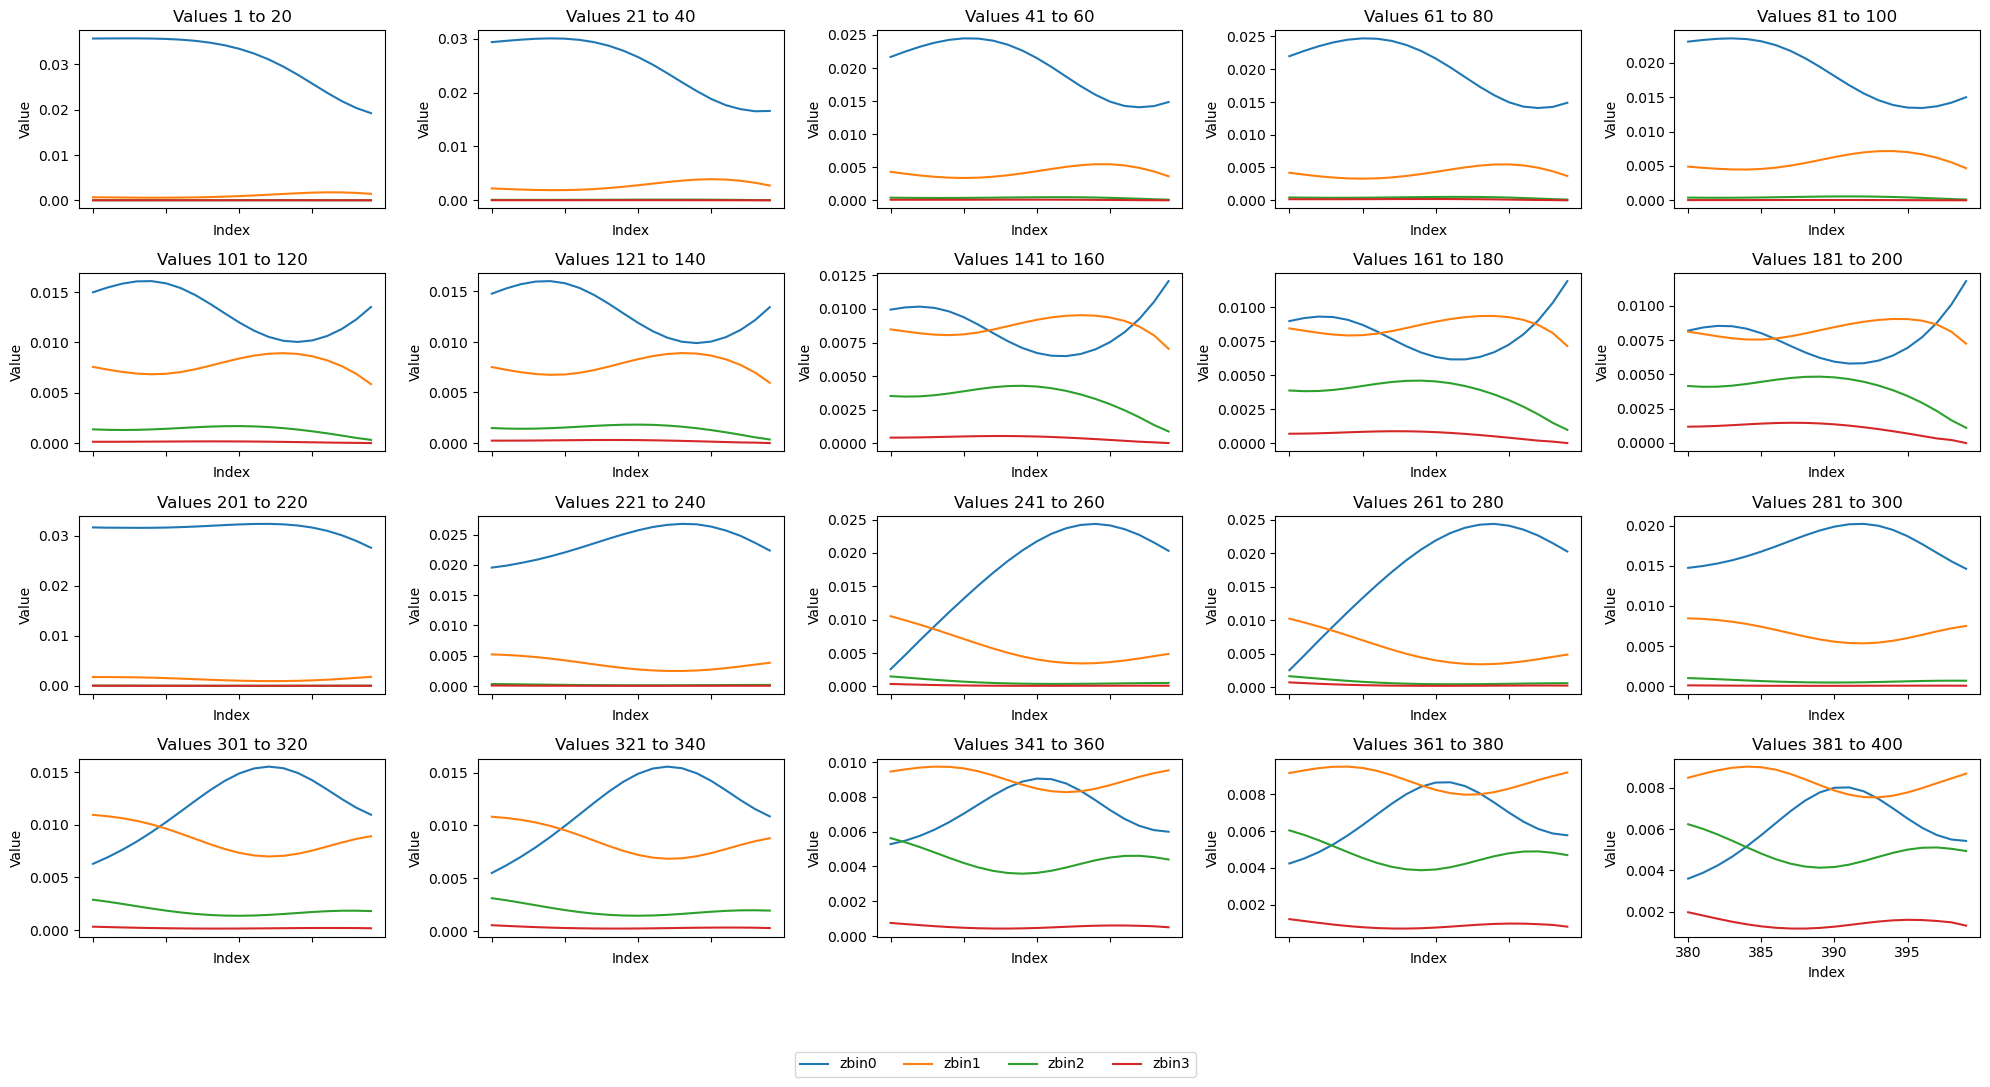

In [103]:
# z residuals only

data = [resid_z[f'resid_z{i}'] for i in range(4)]

data = [sub_array[:400] for sub_array in data]

# Number of chunks (26 values each)
chunk_size = 20
num_chunks = 400 // chunk_size

# Create a figure with appropriate number of subplots
fig, axs = plt.subplots(num_chunks // 5 + (num_chunks % 5 > 0), 5, figsize=(20, 10))

# Flatten axs array if needed
if num_chunks > 5:
    axs = axs.flatten()
else:
    axs = np.array([axs]).flatten()

# Plot each chunk on a separate subplot
for chunk_idx in range(num_chunks):
    for i, sub_array in enumerate(data):
        indices = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 0]
        values = sub_array[chunk_idx * chunk_size:(chunk_idx + 1) * chunk_size, 1]
        if i < 7:
            label = f'zbin{i}'
        else:
            label = f'zbin{i - 5}'
        line, = axs[chunk_idx].plot(indices, values, label=label)
        # Hide x-axis labels for all but the bottom subplot
        if chunk_idx != num_chunks - 1:
            axs[chunk_idx].set_xticklabels([])
        axs[chunk_idx].set_title(f'Values {chunk_idx * chunk_size + 1} to {(chunk_idx + 1) * chunk_size}')
        axs[chunk_idx].set_xlabel('Index')
        axs[chunk_idx].set_ylabel('Value')
        #axs[chunk_idx].set_ylim([0, 6e-7])

# Get handles and labels from the first subplot
handles, labels = axs[0].get_legend_handles_labels()

# Create a single legend for all subplots at the bottom
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [104]:
derivatives = np.array([*k_lists.values(), *z_lists.values()])

derivatives

array([[1.254600e-07, 2.898400e-07, 4.266100e-07, ..., 2.998020e-07,
        4.524890e-07, 5.478785e-07],
       [3.163940e-06, 3.038410e-06, 2.905565e-06, ..., 9.573410e-07,
        7.369395e-07, 4.721265e-07],
       [8.296640e-06, 7.771315e-06, 7.227550e-06, ..., 4.430265e-07,
        2.497545e-07, 1.367230e-07],
       ...,
       [1.281945e-06, 1.039925e-06, 8.330900e-07, ..., 7.507460e-07,
        6.439945e-07, 5.422805e-07],
       [2.391000e-08, 1.929000e-08, 1.569000e-08, ..., 4.671105e-07,
        3.847110e-07, 3.086675e-07],
       [1.214500e-08, 1.018000e-08, 8.625000e-09, ..., 1.413815e-07,
        1.128690e-07, 8.252700e-08]], shape=(11, 400))

In [105]:
num_params = derivatives.shape[0]
fisher_matrix = np.zeros((num_params, num_params))

# Construct the Fisher matrix
for i in range(num_params):
    for j in range(num_params):
        fisher_matrix[i, j] = derivatives[i, :] @ masked_inv_cov @ derivatives[j, :]

print("Fisher Matrix:\n", fisher_matrix)

Fisher Matrix:
 [[  48.39474235   41.21329848   10.5790011    -5.70578349  -19.42075321
   -16.23009392  -13.10232609    6.06220036   33.19772871   21.81695487
     3.93366783]
 [  41.21329848  135.21419917  118.69847999   34.1006572   -12.9375698
   -20.31692525  -13.77713011  175.86097933   66.88046328   37.32000908
     7.43953967]
 [  10.5790011   118.69847999  297.99666216  220.7157474    57.28141579
   -22.23607739  -29.81177019  490.98358104  101.74801899   47.39344716
    10.05553271]
 [  -5.70578349   34.1006572   220.7157474   387.12097864  255.25946346
    34.17001259  -50.66412539  677.68808619  126.46476218   51.96564136
    10.87919627]
 [ -19.42075321  -12.9375698    57.28141579  255.25946346  428.49780736
   236.96761218   23.67571566  713.94605611  170.17995894   50.68820518
     9.26612693]
 [ -16.23009392  -20.31692525  -22.23607739   34.17001259  236.96761218
   306.4537844   143.00321122  413.51814047  163.5688304    51.16573275
     8.51138788]
 [ -13.10232609  -1

Removed no burn in


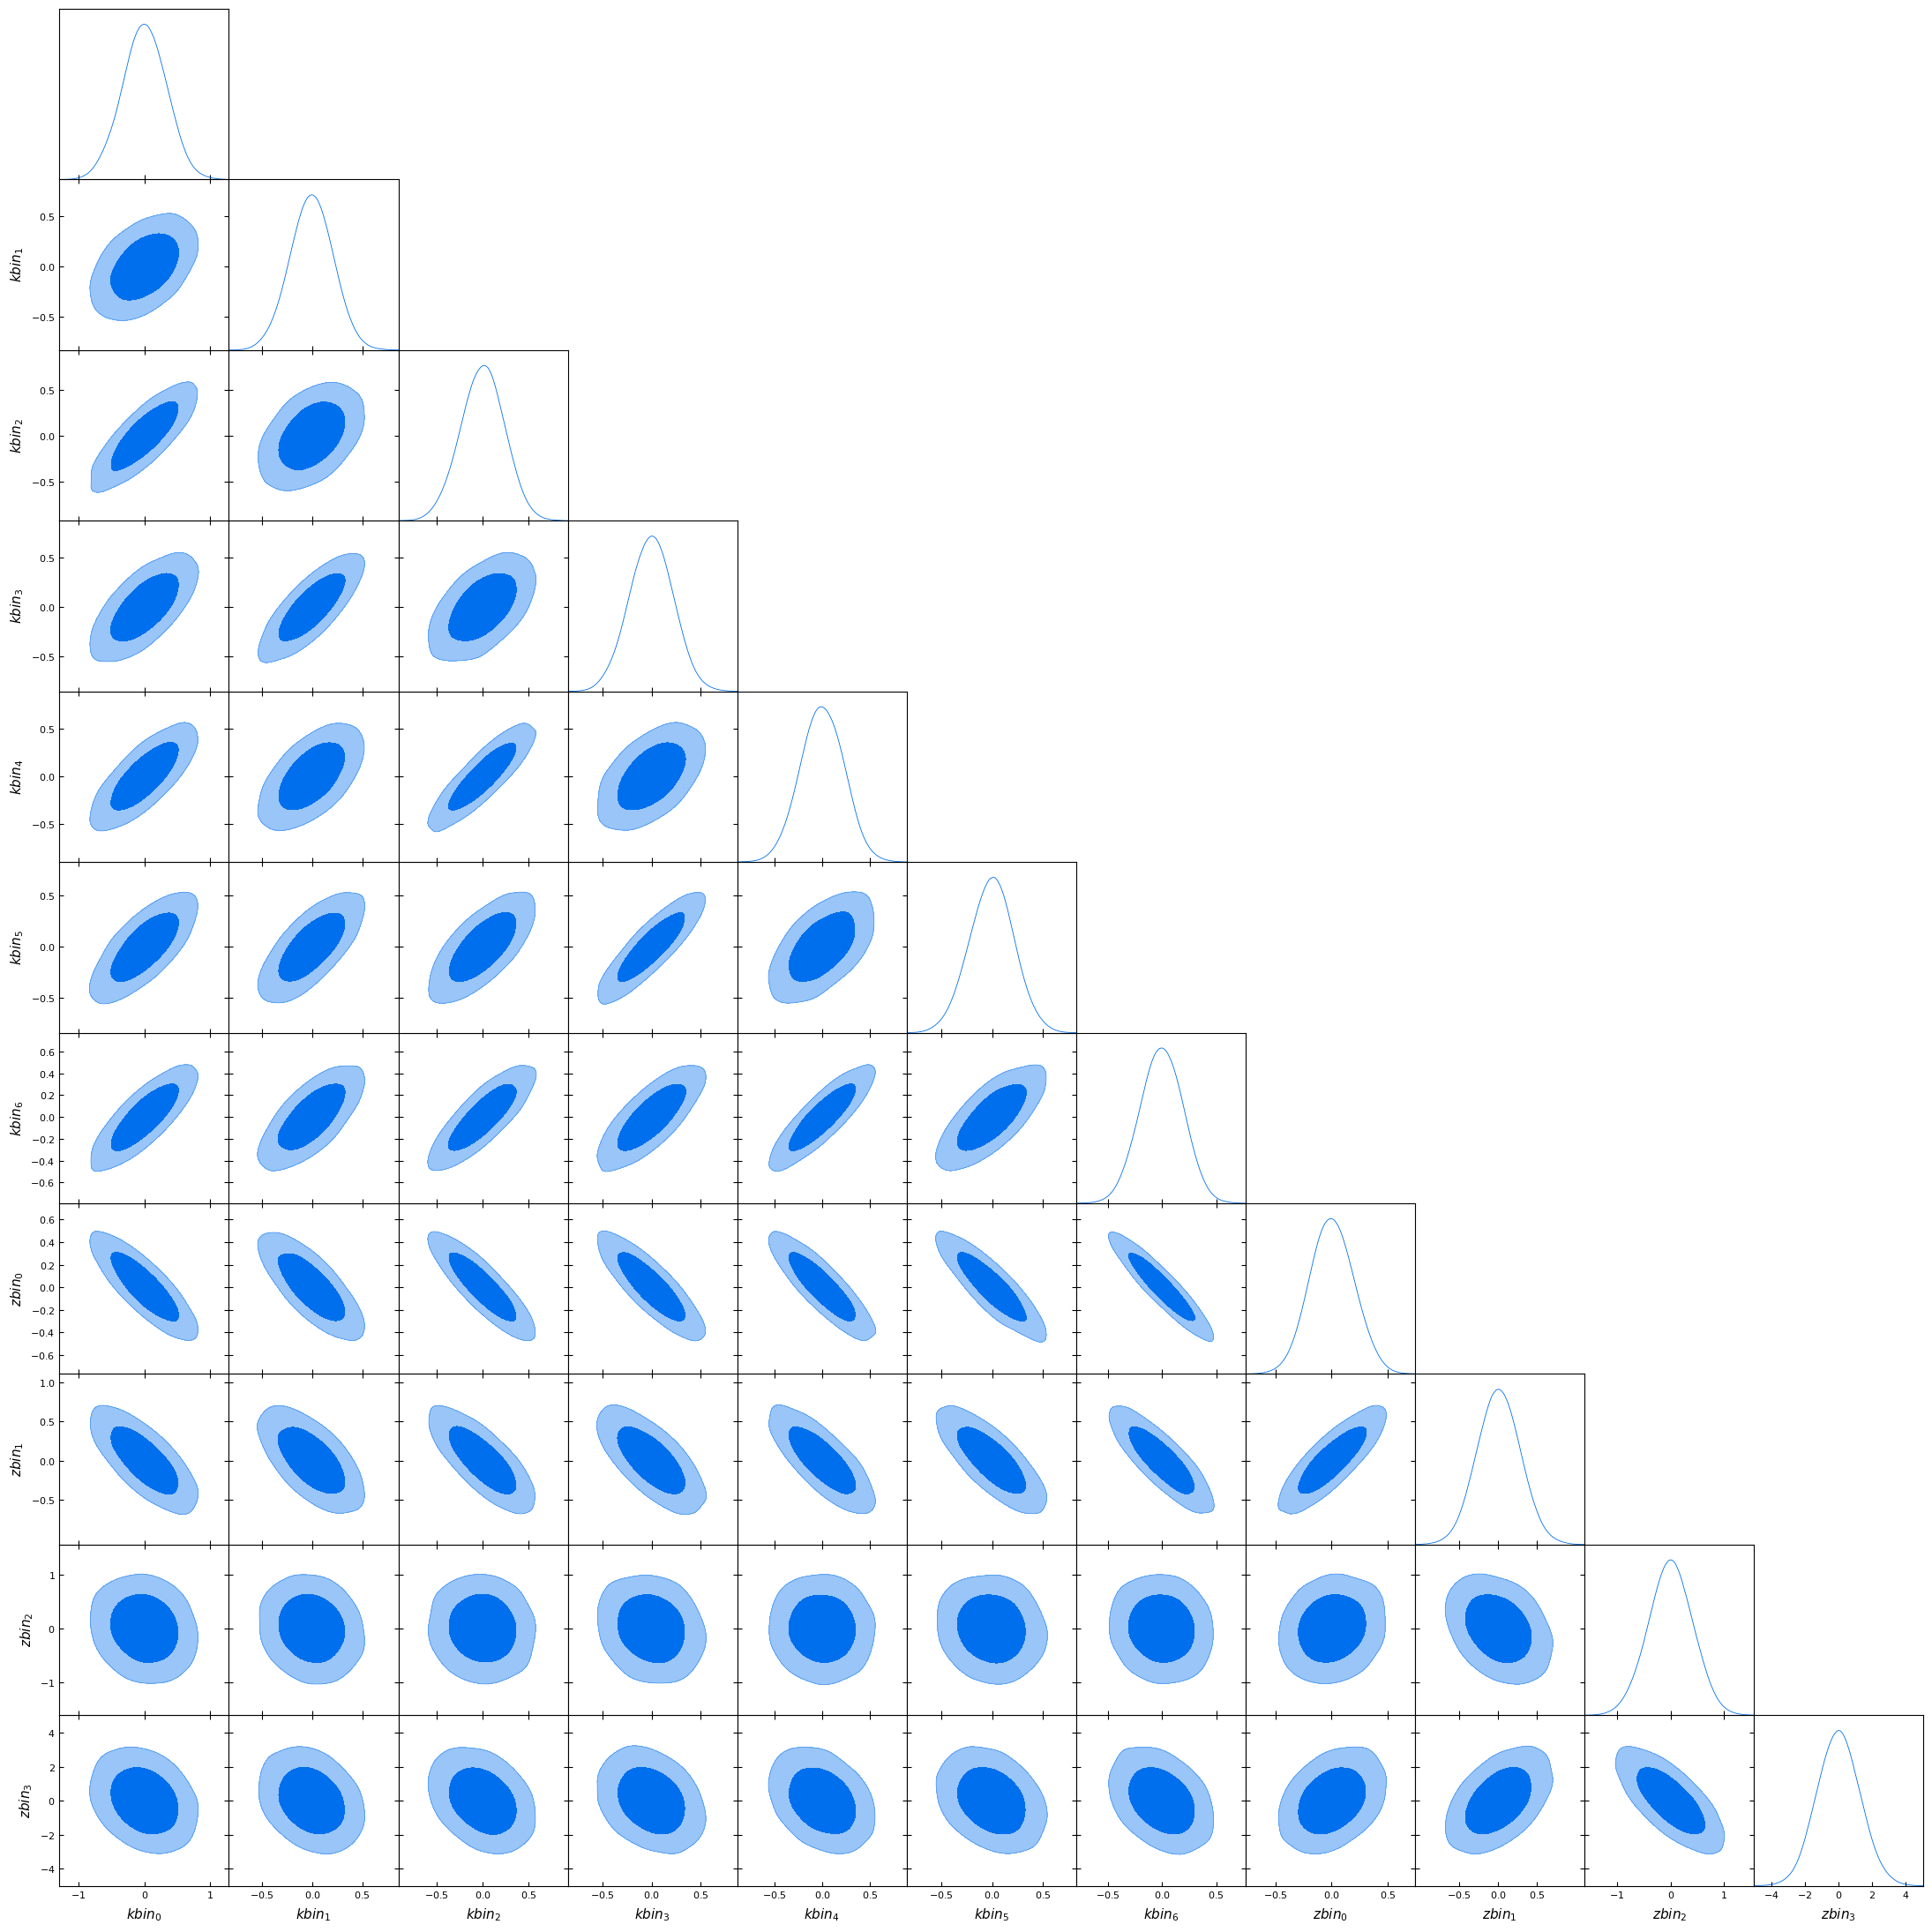

In [106]:
import getdist
import getdist.plots as gplot

cov_matrix = np.linalg.inv(fisher_matrix)

# Define parameter names (modify as needed)
param_names = [f'kbin{i}' for i in range(7)] + [f'zbin{i}' for i in range(4)]
param_labels = [f'kbin_{i}' for i in range(7)] + [f'zbin_{i}' for i in range(4)]

# Generate samples from a multivariate normal distribution
mean = np.zeros(11)  # Assume zero mean for simplicity
samples = np.random.multivariate_normal(mean, cov_matrix, size=10000)

# Create a GetDist MCSamples object using the generated samples
mc_samples = getdist.MCSamples(samples=samples, names=param_names, labels=param_labels)

# Create a corner plot
g = gplot.get_subplot_plotter()
g.triangle_plot(mc_samples, filled=True)

# Display the plot
plt.show()

In [107]:
eigenvalues, eigenvectors = np.linalg.eigh(fisher_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print the sorted eigenvalues and corresponding eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Principal components are the eigenvectors
principal_components = eigenvectors

Eigenvalues:
 [3.00934627e+03 6.08223020e+02 4.33349861e+02 3.17795069e+02
 1.49665214e+02 7.29725706e+01 3.67686711e+01 1.90626067e+01
 1.37870139e+01 2.71813825e+00 5.61083164e-01]
Eigenvectors:
 [[-1.49655680e-03 -1.04770320e-02 -1.29608483e-01  5.42615511e-02
  -2.63369667e-01 -4.59917591e-01 -5.15289698e-01 -4.45257130e-01
  -1.03447228e-01  4.68453809e-01 -7.30058934e-02]
 [-6.47822655e-02 -1.06559754e-01 -3.07536652e-01  2.52829334e-01
  -5.06449706e-01 -2.81587393e-01  3.27377613e-01  5.52346275e-01
   1.47551160e-01  2.32222453e-01 -4.69353459e-02]
 [-1.91363167e-01 -2.96371662e-01 -4.61963642e-01  1.99116867e-01
   3.26878824e-02  5.82271876e-01  2.17810761e-01 -3.27777761e-01
  -1.52987375e-01  3.16151285e-01 -6.43463123e-02]
 [-2.76793965e-01 -2.26880704e-01 -2.53754027e-01 -3.89800820e-01
   5.26118511e-01 -7.48628920e-02 -3.01147160e-01  4.18284291e-01
   1.55678654e-01  2.83888270e-01 -5.18610438e-02]
 [-2.95650129e-01  2.29754591e-01  1.68509290e-01 -5.75883524e-01
  -6

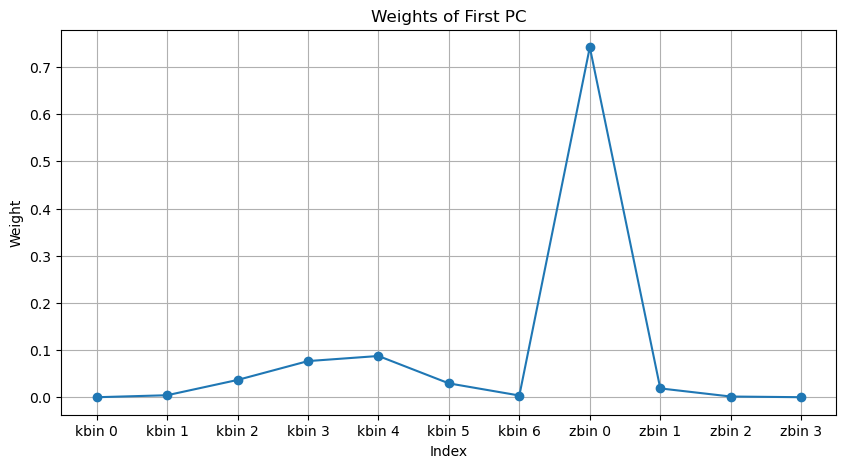

In [108]:
weights = eigenvectors[:,0] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of First PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

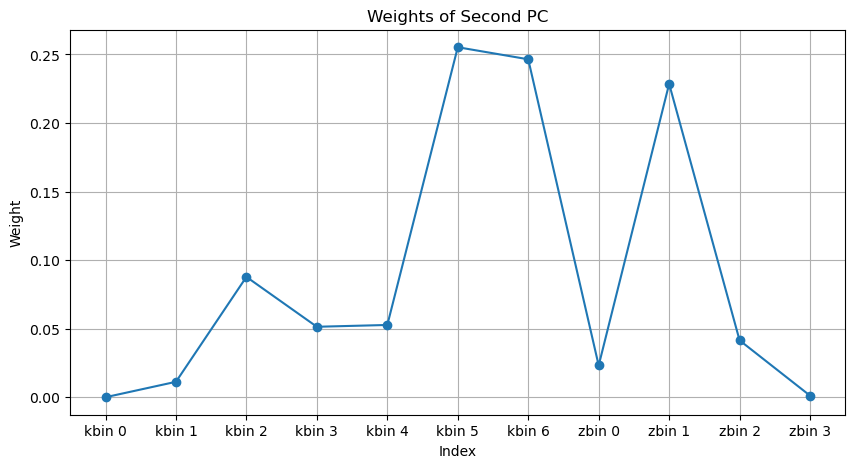

In [109]:
weights = eigenvectors[:,1] ** 2
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Weights of Second PC')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

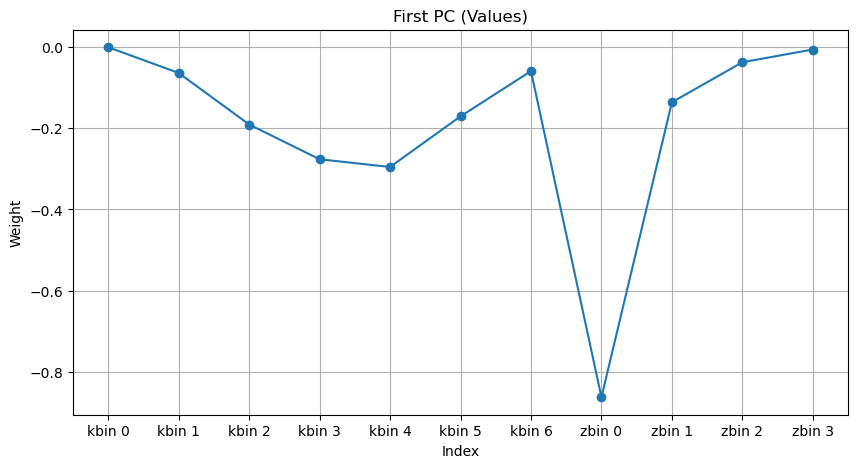

In [110]:
weights = eigenvectors[:,0]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('First PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

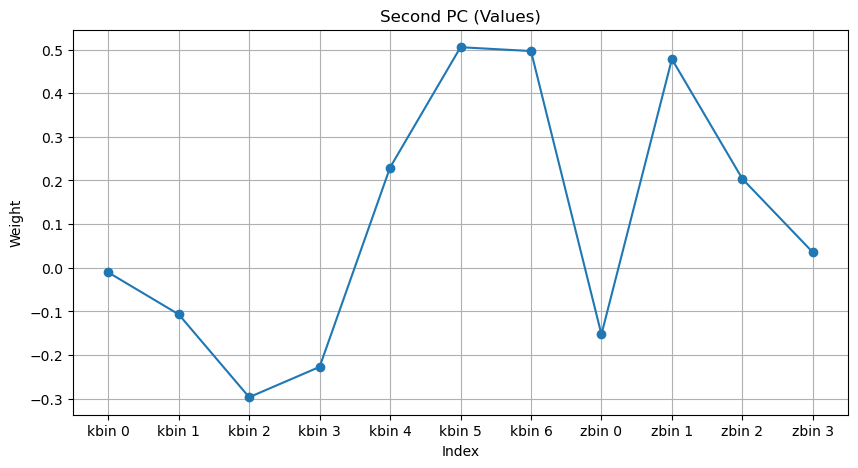

In [111]:
weights = eigenvectors[:,1]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Second PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

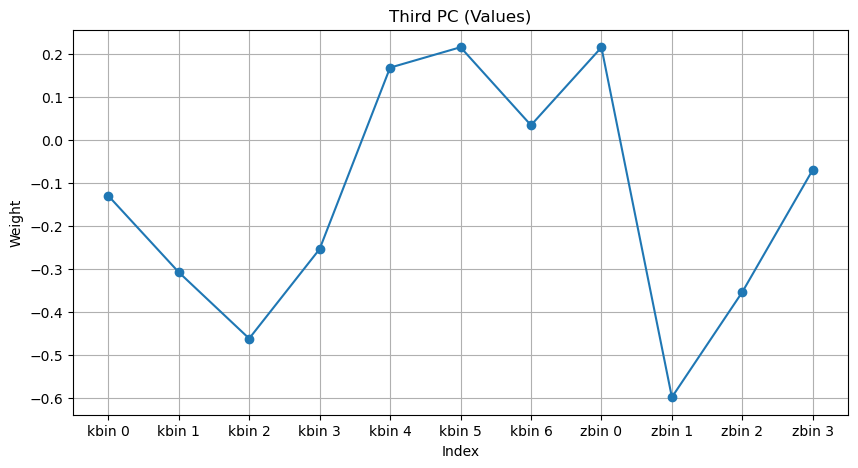

In [112]:
weights = eigenvectors[:,2]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Third PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

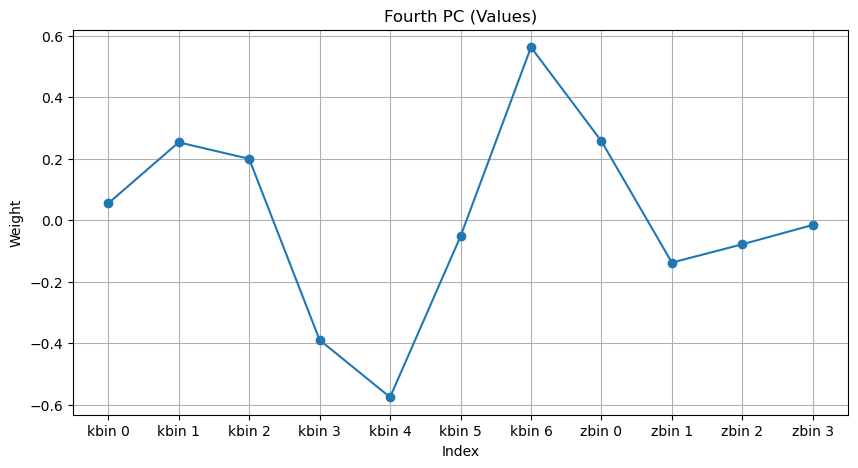

In [113]:
weights = eigenvectors[:,3]
labels = [f'kbin {i}' for i in range(7)] + [f'zbin {i}' for i in range(4)]

# Create the plot
plt.figure(figsize=(10, 5))

plt.plot(weights, marker='o')
plt.title('Fourth PC (Values)')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.xticks(ticks=range(len(weights)), labels=labels)
plt.grid(True)

# Display the plot
plt.show()

In [114]:
# a test here: --> ok so this test shows that this is worse at getting to our estimations than the .1 percent, so we can table this
# for now, we might also want to test this again with the .01 percent possibly even though highly numerically instable I would guess...
from scipy.optimize import minimize


sup_optimal_full = [0.00895256, 0.01500445, 0.01958794, 0.02452636, 0.02981562, 0.02564244,
 0.01614082, 0.0335147,  0.06966564, 0.0334822,  0.00578661]

def chi_square(params):
    csq = 0
    for i in range(4):
        csq += eigenvalues[i] * np.sum(params*eigenvectors[:,i]) ** 2
    return csq

csqLCDM = chi_square(sup_optimal_full)

print("LCDM estimation of csq is:", csqLCDM)

alpha = np.array(sup_optimal_full)
#beta model
def beta_chi_square(beta):
    csq = 0
    alphaOne = np.array([0] * 7 + [0.1,0.3,0.5,0.7])
    for i in range(7, 11):
        alphaOne[i] = beta / (0.7 + 0.3 * (1+alphaOne[i])**3)
    delta_alpha = alpha - alphaOne
    for i in range(4):
        csq += eigenvalues[i] * np.sum(delta_alpha*eigenvectors[:,i]) ** 2
    return csq


initial_guess = [0]

result = minimize(beta_chi_square, initial_guess, method='L-BFGS-B')

print("Optimal beta:", result.x)
print("Minimum value of beta_chi_square:", result.fun)

LCDM estimation of csq is: 15.858226624063583
Optimal beta: [0.07541551]
Minimum value of beta_chi_square: 0.6839926274546343


/var/folders/3m/40whbbgn3j3dj_4wmy4p6sy00000gn/T/ipykernel_20827/864814578.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphaOne[i] = beta / (0.7 + 0.3 * (1+alphaOne[i])**3)
